In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
app_df = pd.read_csv('application_data.csv')
prev_df = pd.read_csv('previous_application.csv')

In [4]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app_df.shape

(307511, 122)

In [6]:
prev_df.shape

(1670214, 37)

In [7]:
app_df.info(verbose=True,null_counts=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3732\1263228775.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  app_df.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [10]:
len(app_df)

307511

In [11]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
min(app_df['DAYS_BIRTH'])

-25229

In [13]:
app_df['AMT_CREDIT'].mean()

599025.9997057016

In [8]:
#checking for the percentage of null values
def perc_nullvalues(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [9]:
perc_nullvalues(app_df)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
len(perc_nullvalues(app_df)[perc_nullvalues(app_df)>40])

49

In [11]:
col_40perc_missing = perc_nullvalues(app_df)[perc_nullvalues(app_df)>40]

In [12]:
col_40perc_missing.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE',
       'EMERGE

In [13]:
#delete the columns having more than 40 percent missing values
app_df = app_df.drop(col_40perc_missing.index,axis=1)

In [14]:
app_df.shape

(307511, 73)

In [15]:
perc_nullvalues(app_df)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_21                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
F

List and deleting the columns, which are not much relevant for the analysis

In [16]:
cols_irrev = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']

In [17]:
app_df = app_df.drop(cols_irrev,axis=1)

In [18]:
app_df.shape

(307511, 54)

In [19]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [20]:
app_df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [21]:
round(app_df['OCCUPATION_TYPE'].value_counts()/len(app_df)*100,2)

Laborers                 17.95
Sales staff              10.44
Core staff                8.97
Managers                  6.95
Drivers                   6.05
High skill tech staff     3.70
Accountants               3.19
Medicine staff            2.78
Security staff            2.19
Cooking staff             1.93
Cleaning staff            1.51
Private service staff     0.86
Low-skill Laborers        0.68
Waiters/barmen staff      0.44
Secretaries               0.42
Realty agents             0.24
HR staff                  0.18
IT staff                  0.17
Name: OCCUPATION_TYPE, dtype: float64

In [22]:
round(app_df['OCCUPATION_TYPE'].isnull().sum()/len(app_df)*100,2)

31.35

There is almost 31% percent missing occupation which is the highest number now let us fill the empty occupation with unknown

In [23]:
app_df["OCCUPATION_TYPE"] = app_df["OCCUPATION_TYPE"].fillna("Unknown") 

We have 6 columns for the number of enquiries to Credit Bureau about the client. It doesn't make much sense to count the number
for a very short period of time such as an hour or a day or a week before the application date.Also taking large period does not make sense too.So for our analysis Purpose we are taking month or quarter only which is not too short nor long.

In [24]:
app_df = app_df.drop(['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1)

In [25]:
app_df[["AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON"]].describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON
count,265992.000000,265992.000000
mean,0.265474,0.267395
std,0.794056,0.916002
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,261.000000,27.000000


This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense in terms of enquires it must be an whole number!). Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [26]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [27]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [28]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)

In [29]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

In [30]:
#There is only a few percent missing values in AMT_good_price columns so we can replace that
app_df.dropna(subset=['AMT_GOODS_PRICE'],inplace=True)

In [31]:
perc_nullvalues(app_df)

EXT_SOURCE_3                   19.82
EXT_SOURCE_2                    0.21
AMT_ANNUITY                     0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
SK_ID_CURR                      0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_21                0.00
AMT_REQ_CREDIT_BUREAU_MON       0.00
FLAG_DOCUMENT_13                0.00
ORGANIZATION_TYPE               0.00
TARGET                          0.00
R

Now We have only two columns which have missing values i.e we almost get the columns on which we have to perform our analysis.Let's finally look at how many rows we have lost in the process. At the begining we had 307511 rows

In [32]:
app_df.shape 

(307233, 50)

In [33]:
#Now Let us convert the DAYS_BIRTH to Age, DAYS_EMPLOYED to Years_employed for better readability
app_df['AGE'] = abs(app_df['DAYS_BIRTH']//365)
app_df['YEARS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED']//365)

In [34]:
#Droppig the Days_borth and days_employed columns
app_df = app_df.drop(['DAYS_BIRTH'],axis=1)
app_df = app_df.drop(['DAYS_EMPLOYED'],axis=1)

In [35]:
#Now Let us Create Three Age groups - Young, Mid age and Senior citizen
app_df['AGE'].describe()

count    307233.000000
mean         44.437808
std          11.954105
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

By this we can see that the minimum age is 21 and maximum age is falling in 70 so we can take less than mean as the young category and more than 60 as a senior citizen

In [36]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [37]:
#Creating new column AGE_GROUP
app_df['AGE_GROUP'] = app_df['AGE'].apply(age_group)
app_df
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,0.622246,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,55,9,Mid Age


# IDENTIFYING OUTLIER 

In [38]:
#Checking the Outlier based on in all numerical columns
col_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','YEARS_EMPLOYED']

In [39]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE',
       'YEARS_E

C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anacon

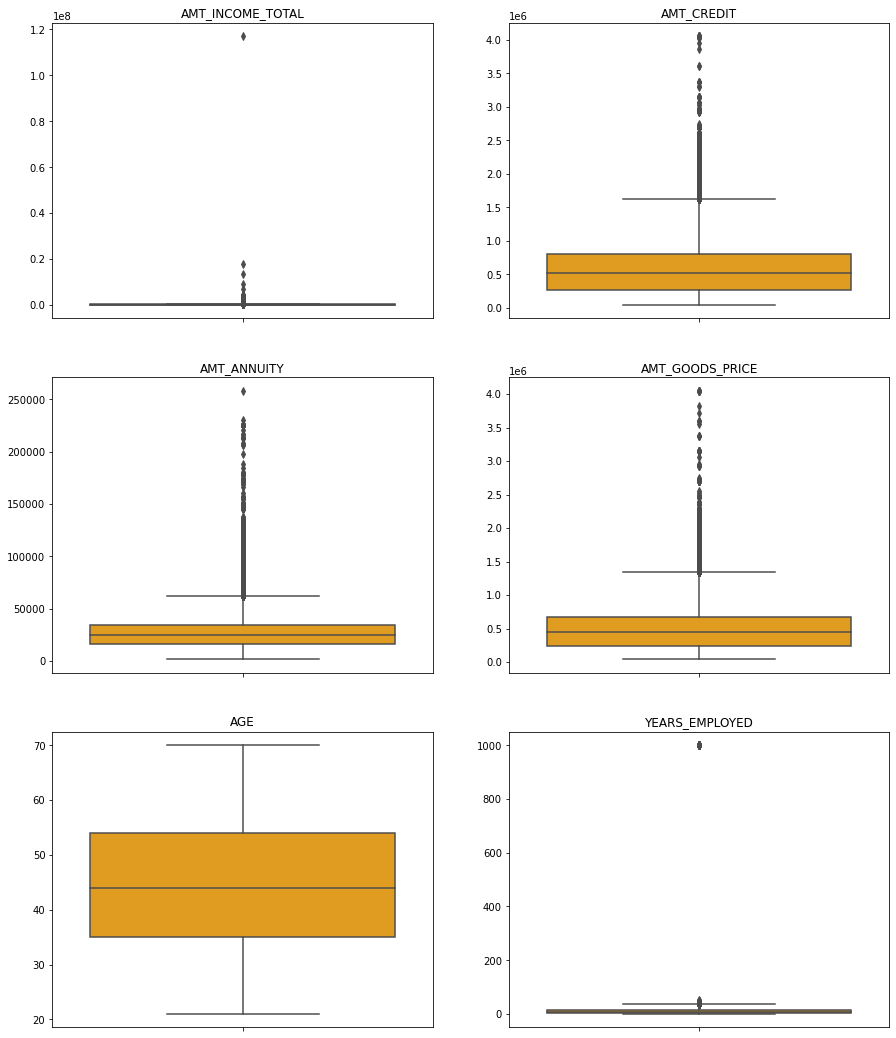

In [40]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(col_outlier, range(len(col_outlier))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = app_df[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)






**Analysis**

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE have some number of outliers.

AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

AGE has no outliers which means the data available is reliable.

YEAR_EMPLOYED has outlier values around 1000 years which is impossible and hence this has to be incorrect entry.

In [41]:
app_df.shape

(307233, 51)

In [42]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE',
       'YEARS_E

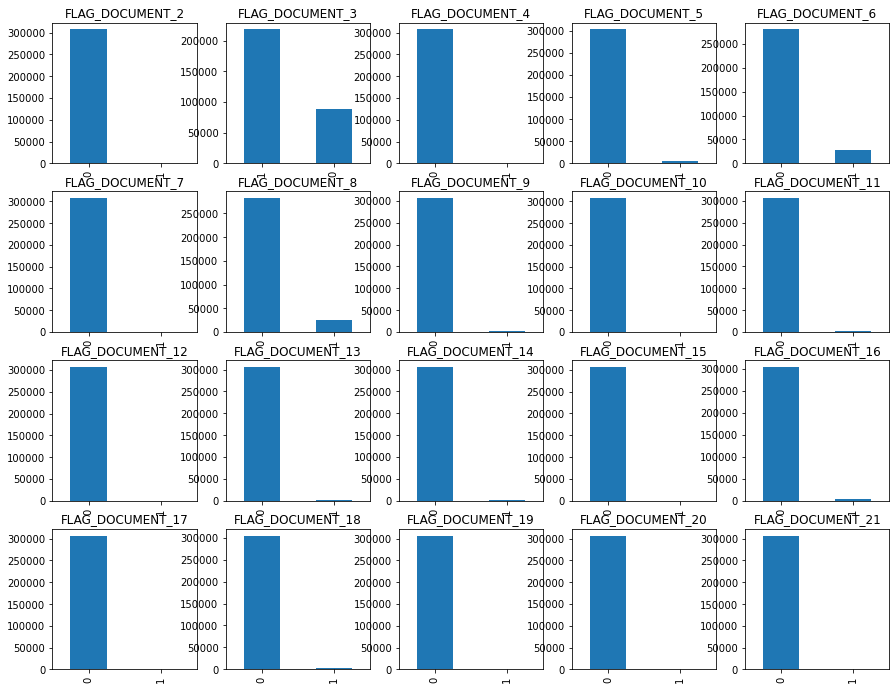

In [43]:
#Now lets analyse the flag_documents columns 
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    app_df[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

We can see the Imbalancing in the Flag_Document except for flag_document_3 all other has negligible count for 1s.This type of
dataset lead to wrong result so we are dropping the all columns except flag_document_3

In [44]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
app_df.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    app_df.drop(col,axis=1,inplace=True)

In [45]:
app_df.shape

(307233, 32)

In [46]:
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_REALTY',
             'REG_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION','REGION_RATING_CLIENT_W_CITY'
              ,'CNT_CHILDREN','CNT_FAM_MEMBERS']
for col in cat_col:
    app_df[col]=pd.Categorical(app_df[col])


In [47]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307233 non-null  int64   
 1   TARGET                       307233 non-null  int64   
 2   NAME_CONTRACT_TYPE           307233 non-null  category
 3   CODE_GENDER                  307233 non-null  category
 4   FLAG_OWN_CAR                 307233 non-null  object  
 5   FLAG_OWN_REALTY              307233 non-null  category
 6   CNT_CHILDREN                 307233 non-null  category
 7   AMT_INCOME_TOTAL             307233 non-null  float64 
 8   AMT_CREDIT                   307233 non-null  float64 
 9   AMT_ANNUITY                  307221 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_INCOME_TYPE             307233 non-null  category
 12  NAME_EDUCATION_TYPE          307233 non-null

Now we have total of 29 columns and we will move ahead with these columns

# Previous Application Dataset

In [48]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
prev_df.shape

(1670214, 37)

In [50]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [51]:
prev_df.replace('XNA',np.nan,inplace=True)
prev_df.replace('XAP',np.nan,inplace=True)

In [52]:
perc_nullvalues(prev_df)

RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
CODE_REJECT_REASON             81.33
NAME_PRODUCT_TYPE              63.68
NAME_GOODS_CATEGORY            56.93
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_SELLER_INDUSTRY           51.23
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
NAME_CLIENT_TYPE                0.12
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
DAYS_DECISION                   0.00
A

In [53]:
col_40perc_missing = perc_nullvalues(prev_df)[perc_nullvalues(prev_df)>40].index
len(col_40perc_missing)

16

In [54]:
#Dropping all the columns which have missing values more than 40%
prev_df.drop(columns = col_40perc_missing,inplace=True)

In [55]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [56]:
prev_df['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['Y', 'N'], dtype=object)

In [57]:
prev_df.shape

(1670214, 21)

In [58]:
#Now List and Delete the columns which are not relevant for our analysis
prev_irr = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
prev_df.drop(prev_irr,inplace=True,axis=1)

In [59]:
prev_df.shape

(1670214, 17)

In [60]:
#Treating the remaining missing values in the rows
perc_nullvalues(prev_df)

NAME_PAYMENT_TYPE       37.56
NAME_YIELD_GROUP        30.97
AMT_GOODS_PRICE         23.08
AMT_ANNUITY             22.29
CNT_PAYMENT             22.29
NAME_PORTFOLIO          22.29
NAME_CLIENT_TYPE         0.12
PRODUCT_COMBINATION      0.02
NAME_CONTRACT_TYPE       0.02
AMT_CREDIT               0.00
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_STATUS     0.00
AMT_APPLICATION          0.00
DAYS_DECISION            0.00
dtype: float64

In [61]:
prev_df['NAME_PORTFOLIO'].unique()

array(['POS', 'Cash', nan, 'Cards', 'Cars'], dtype=object)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

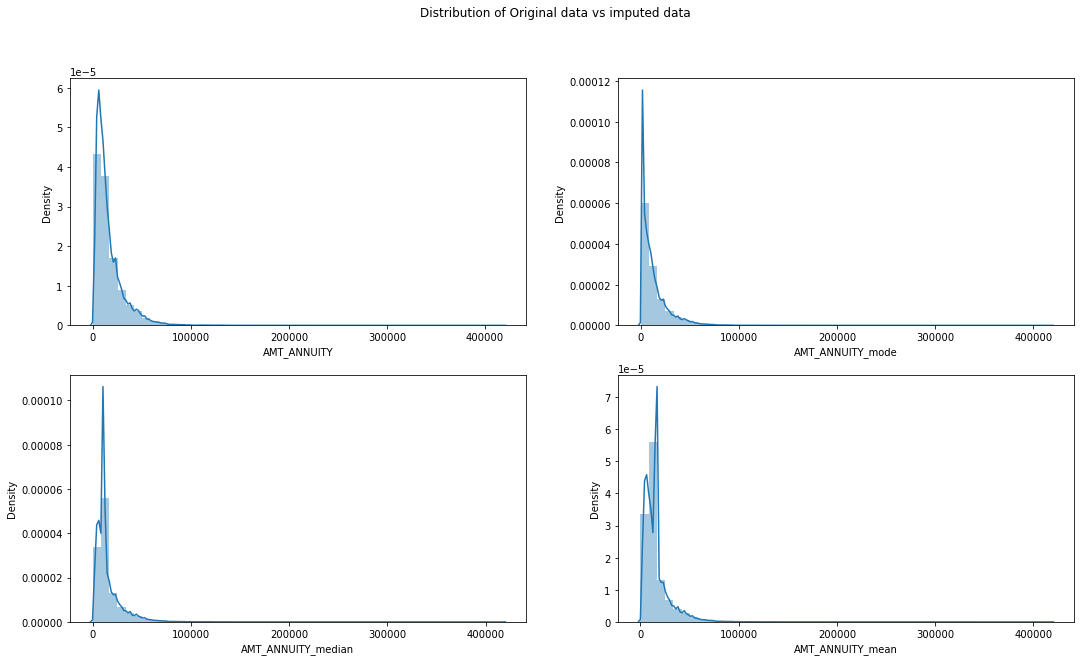

In [60]:
statsDF = pd.DataFrame() 
statsDF['AMT_ANNUITY_mode'] = prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].mode()[0])
statsDF['AMT_ANNUITY_median'] = prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median())
statsDF['AMT_ANNUITY_mean'] = prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].mean())

cols = ['AMT_ANNUITY_mode', 'AMT_ANNUITY_median','AMT_ANNUITY_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_df['AMT_ANNUITY'][pd.notnull(prev_df['AMT_ANNUITY'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

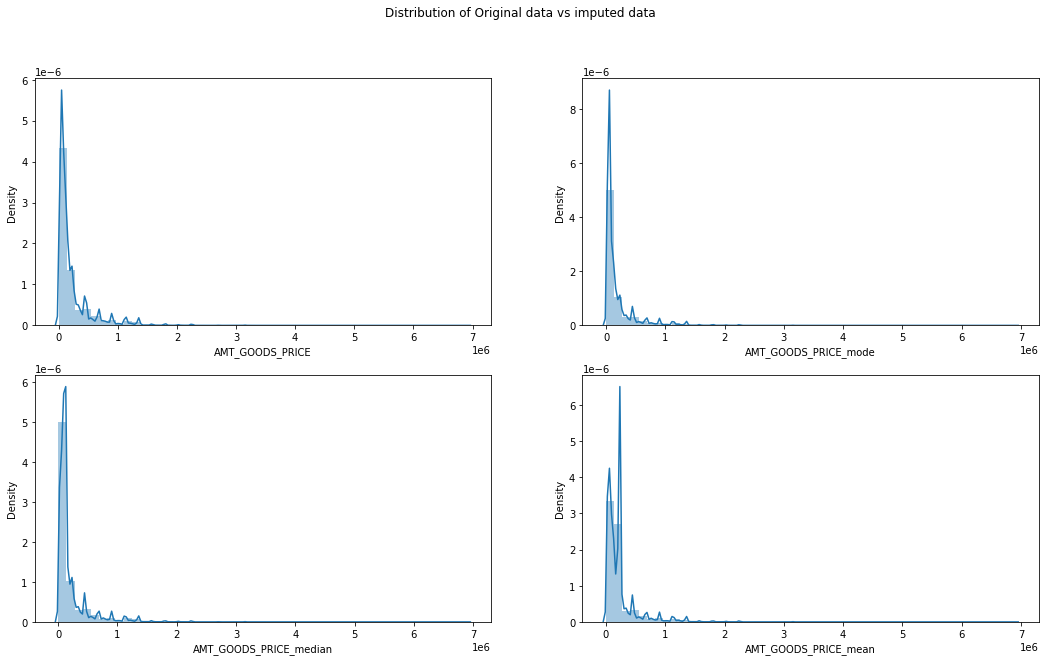

In [61]:
statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_df['AMT_GOODS_PRICE'][pd.notnull(prev_df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

As we can see that the original distribution is closer with the distribution of data imputed with mode in both these cases, thus will impute mode for missing values

In [62]:
prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)
prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].mode()[0], inplace=True)

In [63]:
perc_nullvalues(prev_df)

NAME_PAYMENT_TYPE       37.56
NAME_YIELD_GROUP        30.97
CNT_PAYMENT             22.29
NAME_PORTFOLIO          22.29
NAME_CLIENT_TYPE         0.12
PRODUCT_COMBINATION      0.02
NAME_CONTRACT_TYPE       0.02
AMT_CREDIT               0.00
SELLERPLACE_AREA         0.00
CHANNEL_TYPE             0.00
SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_STATUS     0.00
AMT_GOODS_PRICE          0.00
AMT_APPLICATION          0.00
AMT_ANNUITY              0.00
DAYS_DECISION            0.00
dtype: float64

In [64]:
#Converting Days decision columns to Month Decision 
prev_df['MONTH_DECISION'] = abs(prev_df['DAYS_DECISION']//30)

In [65]:
# Drop 'DAYS_DECISION' column
prev_df = prev_df.drop(['DAYS_DECISION'],axis=1)

In [66]:
prev_df.shape

(1670214, 17)

In [67]:
perc_nullvalues(prev_df)

NAME_PAYMENT_TYPE       37.56
NAME_YIELD_GROUP        30.97
NAME_PORTFOLIO          22.29
CNT_PAYMENT             22.29
NAME_CLIENT_TYPE         0.12
NAME_CONTRACT_TYPE       0.02
PRODUCT_COMBINATION      0.02
AMT_CREDIT               0.00
SELLERPLACE_AREA         0.00
CHANNEL_TYPE             0.00
SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_STATUS     0.00
AMT_GOODS_PRICE          0.00
AMT_APPLICATION          0.00
AMT_ANNUITY              0.00
MONTH_DECISION           0.00
dtype: float64

In [68]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [69]:
#AS we can see that most of the loan has not even started so we are putting the cnt_payment to 0
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\user\anacon

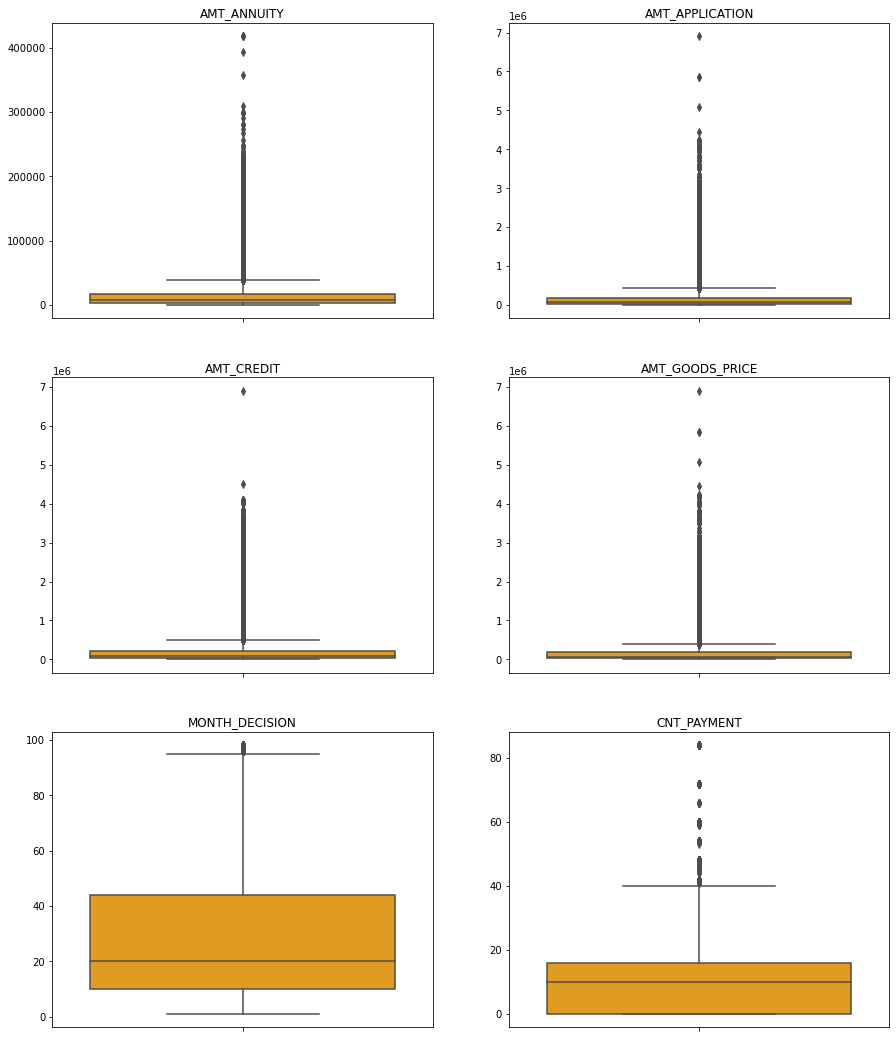

In [70]:
#Finding Outliers
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','MONTH_DECISION','CNT_PAYMENT']
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(col_list_outlier, range(len(col_list_outlier))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_df[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

Insight:

It can be seen that in previous application data

1)AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE have huge number of outliers.

2)CNT_PAYMENT has few outlier values.

3)MONTH_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

In [71]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669868 non-null  object 
 3   AMT_ANNUITY           1670214 non-null  float64
 4   AMT_APPLICATION       1670214 non-null  float64
 5   AMT_CREDIT            1670213 non-null  float64
 6   AMT_GOODS_PRICE       1670214 non-null  float64
 7   NAME_CONTRACT_STATUS  1670214 non-null  object 
 8   NAME_PAYMENT_TYPE     1042830 non-null  object 
 9   NAME_CLIENT_TYPE      1668273 non-null  object 
 10  NAME_PORTFOLIO        1297984 non-null  object 
 11  CHANNEL_TYPE          1670214 non-null  object 
 12  SELLERPLACE_AREA      1670214 non-null  int64  
 13  CNT_PAYMENT           1670214 non-null  float64
 14  NAME_YIELD_GROUP      1152999 non-

In [72]:
#Converting required categoical columns from Object to categorical 

p_catgorical_col = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                      'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for col in p_catgorical_col:
    prev_df[col] =pd.Categorical(prev_df[col])

# ANALYSING THE DATA

In [170]:
app_df['AMT_CREDIT'].describe().apply(lambda x : format(x,'.2f'))

count     307229.00
mean      599317.61
std       402519.54
min        45000.00
25%       270000.00
50%       514602.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: object

In [82]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [83]:
#Creating new column AGE_GROUP
app_df['CREDIT_GROUP'] = app_df['AMT_CREDIT'].apply(credit_group)

In [168]:
#Creating three income groups - Hign, medium and Low
app_df['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, '.2f'))

count       307229.00
mean        168833.01
std         237217.18
min          25650.00
25%         112500.00
50%         148500.00
75%         202500.00
max      117000000.00
Name: AMT_INCOME_TOTAL, dtype: object

In [85]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [86]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
app_df['INCOME_GROUP'] = app_df['AMT_INCOME_TOTAL'].apply(income_group)

In [87]:
#income group
#age group
#Credit group
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,1,0.0,0.0,26,2,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,0.622246,NaN,1,0.0,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0.0,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,NaN,1,0.0,0.0,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,NaN,0,0.0,0.0,55,9,Mid Age,Medium,Medium


In [88]:
app_df['EXT_SOURCE_SCORE'] = round(((app_df['EXT_SOURCE_2'] + app_df['EXT_SOURCE_3'])/2),2)
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
app_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [89]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

Creating three External source score groups - High, Medium and Low

In [90]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
app_df['EXT_SCORE_CATEGORY'] = app_df['EXT_SOURCE_SCORE'].apply(ext_source_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,1,0.0,0.0,26,2,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-291,Core staff,2.0,1,1,0,0,School,1,0.0,0.0,46,4,Mid Age,High,High,NaN,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-2531,Laborers,1.0,2,2,0,0,Government,0,0.0,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,1,0.0,0.0,53,9,Mid Age,Low,Medium,NaN,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3458,Core staff,1.0,2,2,0,0,Religion,0,0.0,0.0,55,9,Mid Age,Medium,Medium,NaN,High


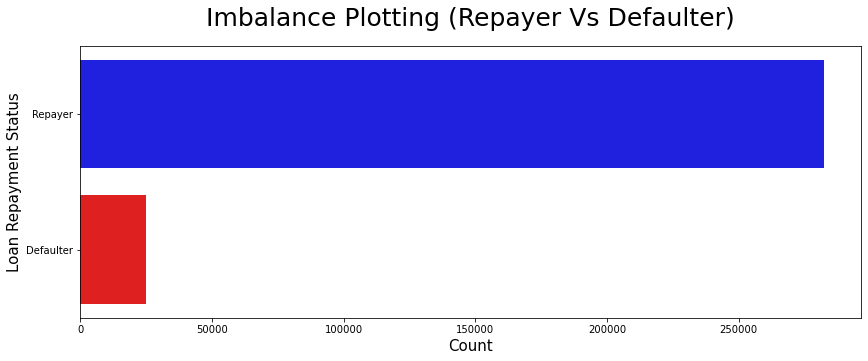

In [73]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"],x=app_df['TARGET'].value_counts(),palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

We can see that there is an Imbalancing in the Target column in the repayer and defaulter values


In [74]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((app_df["TARGET"].value_counts()[0]/len(app_df)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((app_df["TARGET"].value_counts()[1]/len(app_df)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is: 11.39/1 (approx)


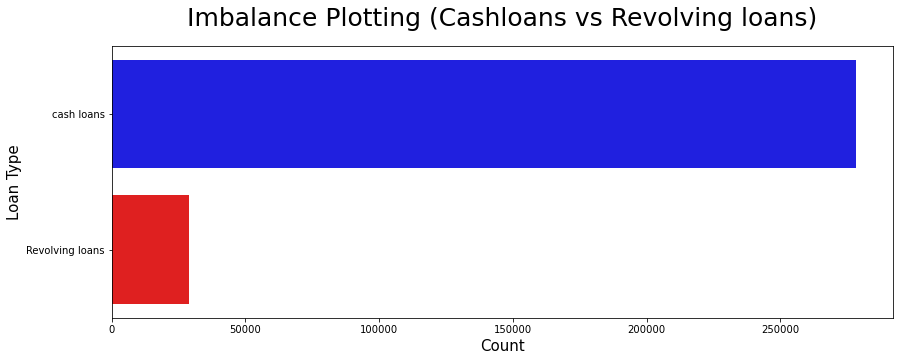

In [75]:
plt.figure(figsize= [14,5])
sns.barplot(y=["cash loans","Revolving loans"],x=app_df['NAME_CONTRACT_TYPE'].value_counts(),palette = ["blue","r"],orient="h")
plt.ylabel("Loan Type",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Cashloans vs Revolving loans)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [76]:
#Ratio of imbalance percentage with respect to cash loan and revolving loan is given below 
cashloans= round((app_df["NAME_CONTRACT_TYPE"].value_counts()[0]/len(app_df)* 100),2)
print("cash loan Percentage is {}%".format(cashloans))
revolvingloans = round((app_df["NAME_CONTRACT_TYPE"].value_counts()[1]/len(app_df)* 100),2)
print("revolving loan Percentage is {}%".format(revolvingloans))
print("Imbalance Ratio with respect to cash and revolving loan is: {0:.2f}/1 (approx)".format(cashloans/revolvingloans))

cash loan Percentage is 90.56%
revolving loan Percentage is 9.44%
Imbalance Ratio with respect to cash and revolving loan is: 9.59/1 (approx)


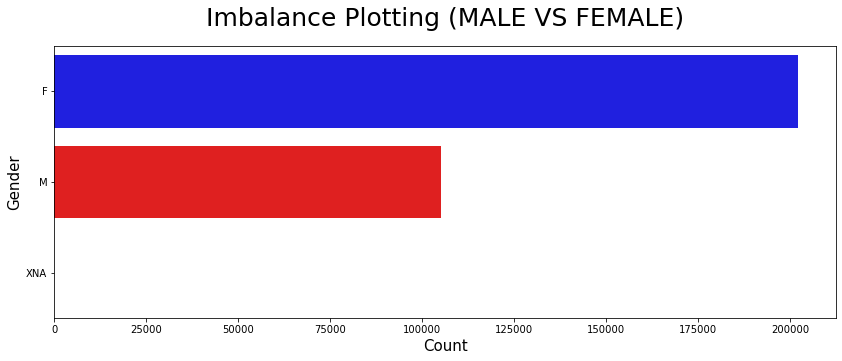

In [77]:
plt.figure(figsize= [14,5])
sns.barplot(y=["F","M",'XNA'],x=app_df['CODE_GENDER'].value_counts(),palette = ["blue","r"],orient="h")
plt.ylabel("Gender",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (MALE VS FEMALE)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [78]:
#Ratio of imbalance percentage with respect to male and female is given below 
Female= round((app_df['CODE_GENDER'].value_counts()[0]/len(app_df)* 100),2)
print("Female Percentage is {}%".format(Female))
Male = round((app_df["CODE_GENDER"].value_counts()[1]/len(app_df)* 100),2)
print("Male Percentage is {}%".format(Male))
print("Imbalance Ratio with respect to Female and Male is: {0:.2f}/1 (approx)".format(Female/Male))

Female Percentage is 65.83%
Male Percentage is 34.17%
Imbalance Ratio with respect to Female and Male is: 1.93/1 (approx)


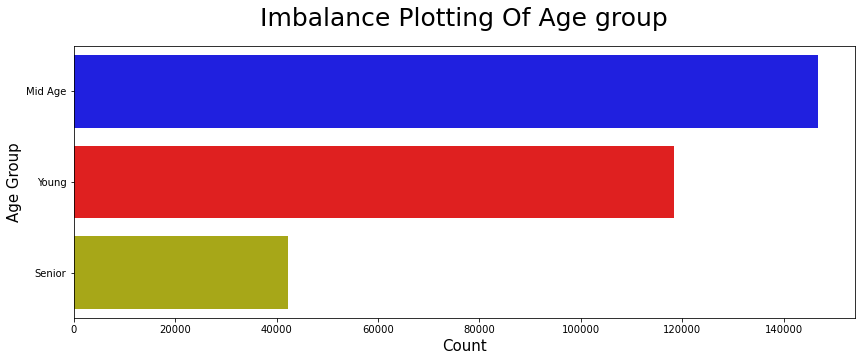

In [79]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Mid Age","Young",'Senior'],x=app_df['AGE_GROUP'].value_counts(),palette = ["blue","r",'y'],orient="h")
plt.ylabel("Age Group",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting Of Age group", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [80]:
#Ratio of imbalance percentage with respect to Age group is given below 
Midage= round((app_df['AGE_GROUP'].value_counts()[0]/len(app_df)* 100),2)
print("Mid Age Percentage is {}%".format(Midage))
Young =  round((app_df["AGE_GROUP"].value_counts()[1]/len(app_df)* 100),2)
print("Young Age Percentage is {}%".format(Young))
senior= round((app_df['AGE_GROUP'].value_counts()[2]/len(app_df)*100),2)
print('Senior Percentage is {}%'.format(senior))

Mid Age Percentage is 47.73%
Young Age Percentage is 38.54%
Senior Percentage is 13.73%


In [91]:
app_df['INCOME_GROUP'].value_counts()

High      152147
Medium     91503
Low        63583
Name: INCOME_GROUP, dtype: int64

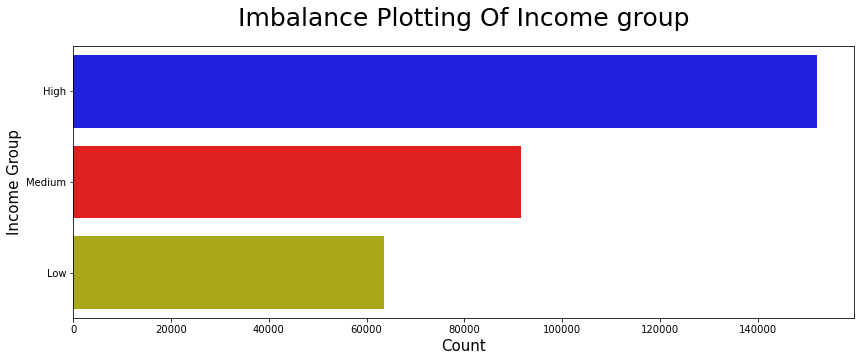

In [92]:
plt.figure(figsize= [14,5])
sns.barplot(y=["High","Medium",'Low'],x=app_df['INCOME_GROUP'].value_counts(),palette = ["blue","r",'y'],orient="h")
plt.ylabel("Income Group",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting Of Income group", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [93]:
high= round((app_df['INCOME_GROUP'].value_counts()[0]/len(app_df)* 100),2)
print("High Income group Percentage is {}%".format(high))
medium =  round((app_df["INCOME_GROUP"].value_counts()[1]/len(app_df)* 100),2)
print("Medium Income group Percentage is {}%".format(medium))
low = round((app_df['INCOME_GROUP'].value_counts()[2]/len(app_df)*100),2)
print('Low Income group Percentage is {}%'.format(low))

High Income group Percentage is 49.52%
Medium Income group Percentage is 29.78%
Low Income group Percentage is 20.7%


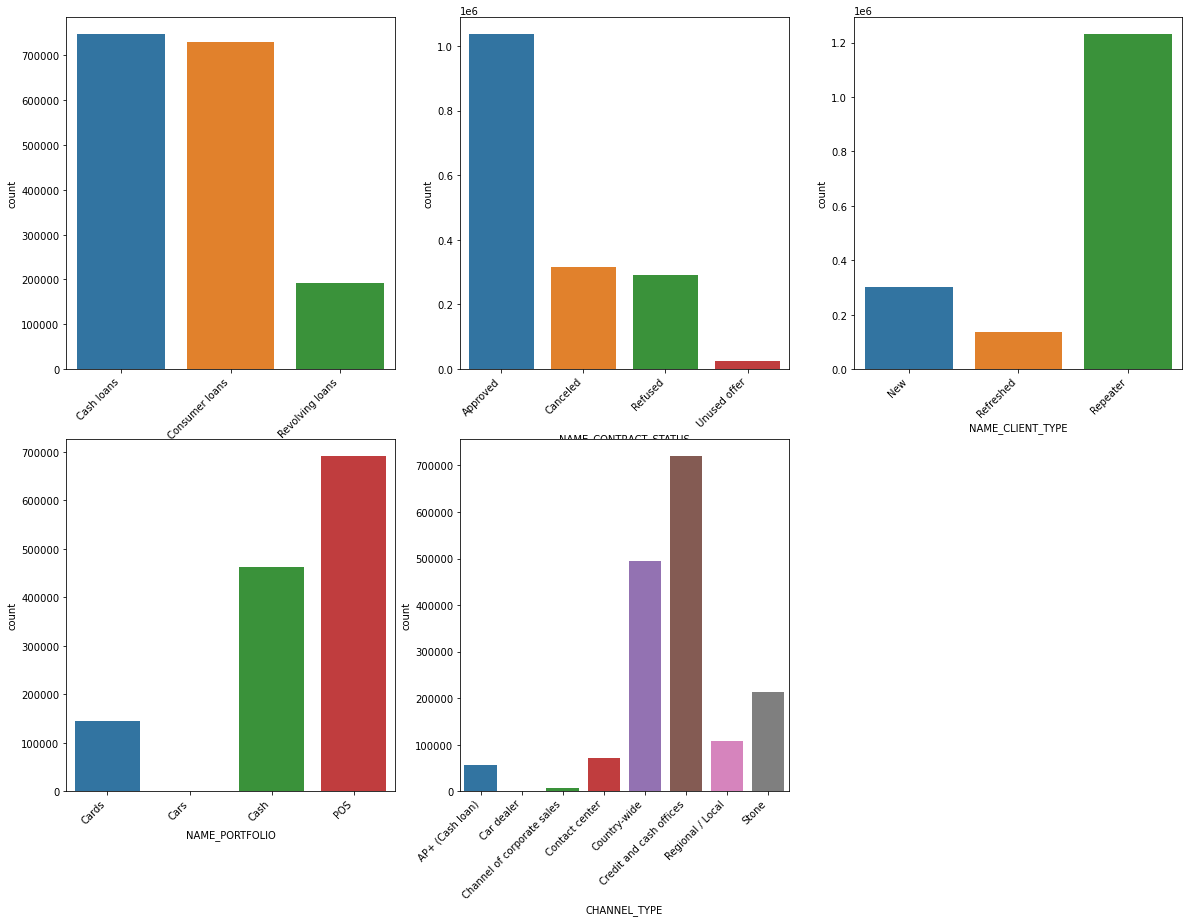

In [94]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = prev_df )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [96]:
app_df.shape

(307233, 34)

In [97]:
app_df['CODE_GENDER'].value_counts()

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [98]:
#Remove the rows where the gender is XNA as the number is only 4 we can easily remove that
app_df = app_df[~(app_df['CODE_GENDER'] == 'XNA')]

**Univariate Analysis on Categorical Data**

In [99]:
def Defaulter_perc(dataset,col,target_col):
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
#Defaulter Percentage
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        sns.barplot(ax=ax, x = col, y=target_col, data=target_1_percentage)
        ax.set_title("Defaulters % in "+col, fontsize = 20)    
        ax.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
        plt.show()

**Defaulter and non defaulater on the basis of Gender**

[Text(0.5, 0, 'Gender')]

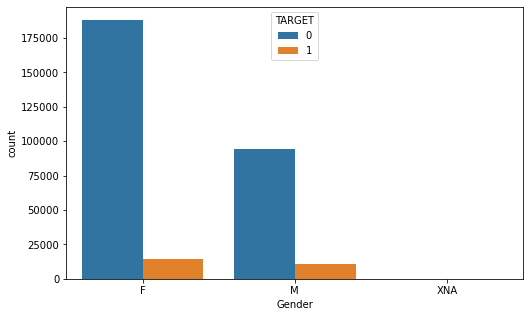

In [100]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Gender')

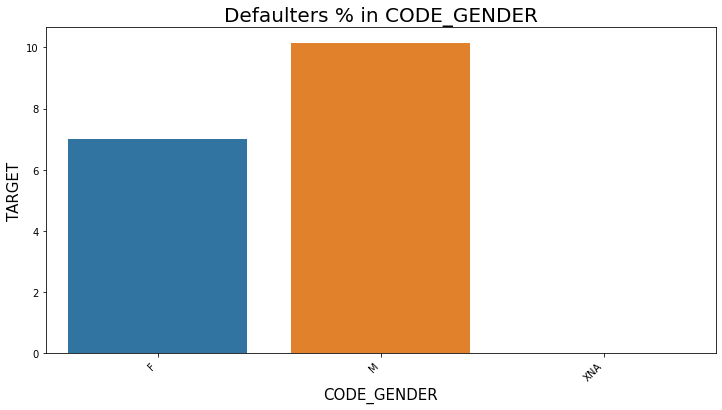

In [101]:
Defaulter_perc(app_df,'CODE_GENDER','TARGET')

**Analysis**

The **Females** are high in number when it comes to repaying the loan whereas non repaying or defaulter category both men and females can considered comparable

**Defaulters and non-defaulters on the basis of Loan type**

[Text(0.5, 0, 'loan Type')]

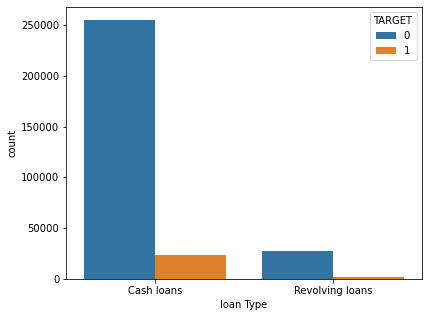

In [102]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='loan Type')

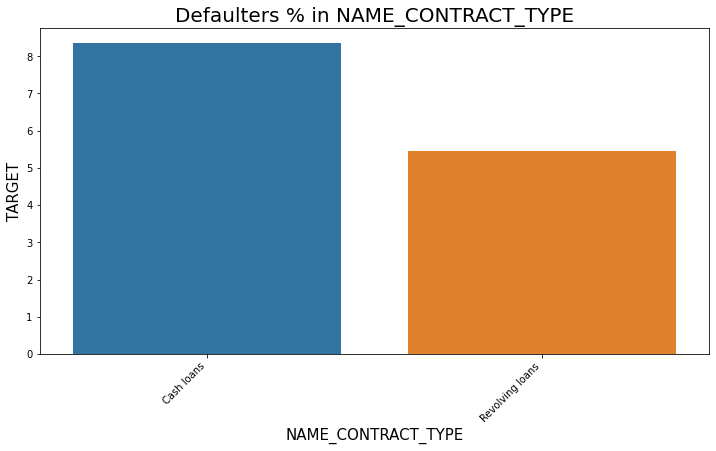

In [103]:
Defaulter_perc(app_df,'NAME_CONTRACT_TYPE','TARGET')

**Analysis**

As we already Know that there is Imbalance in the cash and revolving loans which is around 8 percent therefore contract in cashloan must be higher than revoliving loans

**Defaulters and non-defaulters on the basis of Income type**

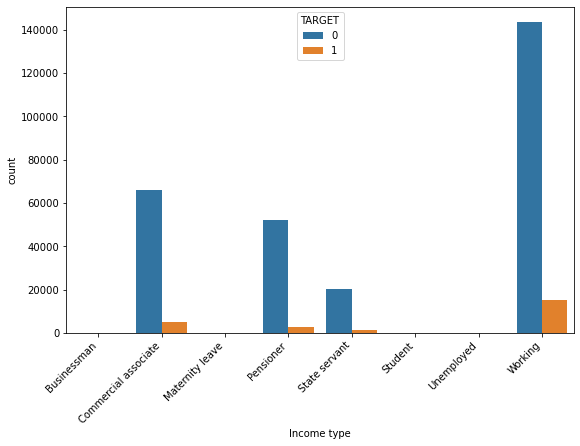

In [104]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

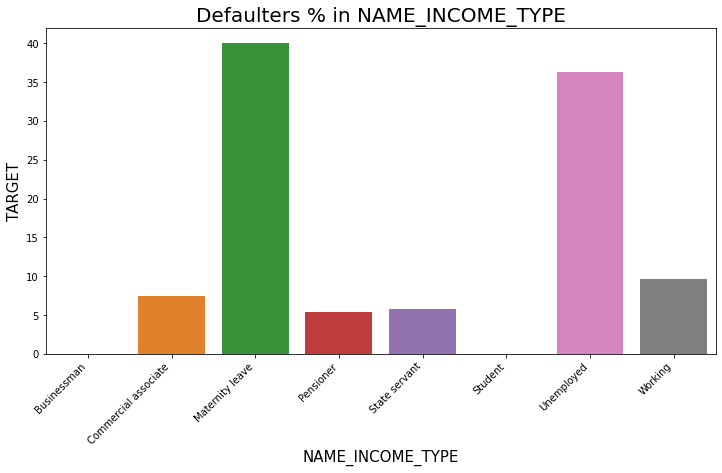

In [105]:
Defaulter_perc(app_df,'NAME_INCOME_TYPE','TARGET')

In [106]:
app_df['NAME_INCOME_TYPE'].value_counts()

Working                 158586
Commercial associate     71569
Pensioner                55339
State servant            21680
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Analysis**

As we can see that the working professional is very high in number who is taking the loan therefore from the above bar graph we can conlcude that working professional are mostly the repayer and defaulter both

**Defaulters on the basis of Education type**

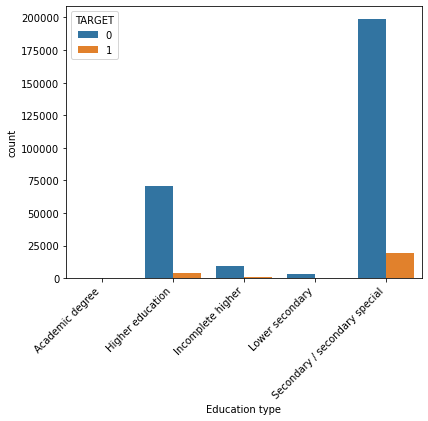

In [107]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

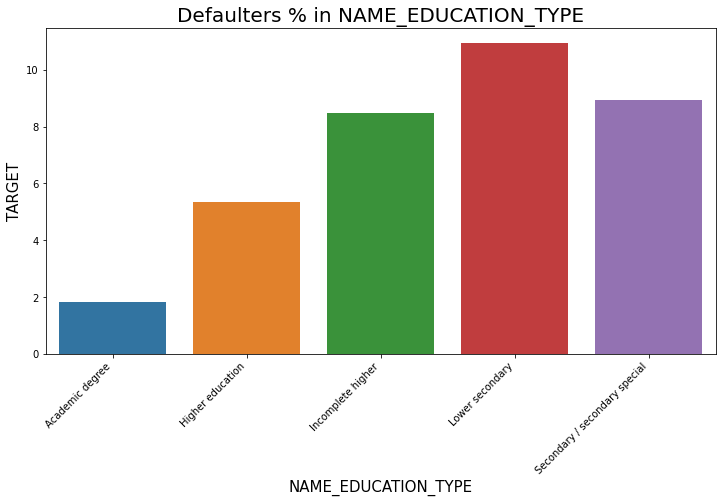

In [173]:
Defaulter_perc(app_df,'NAME_EDUCATION_TYPE','TARGET')

**Analysis**

Majority of clients have Secondary/secondary special education, followed by clients with Higher education.

Very few clients have an academic degree.

Lower secondary category have highest rate of defaulting around 11%.

People with Academic degree are least likely to default.

**Defaulters and non-defaulters on the basis of Family status**

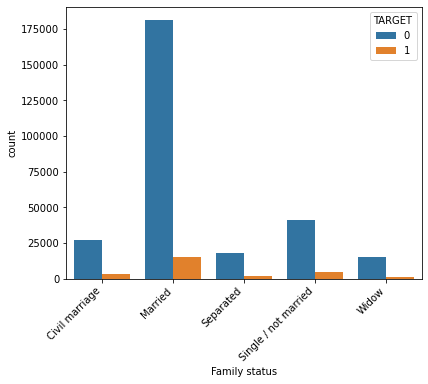

In [109]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


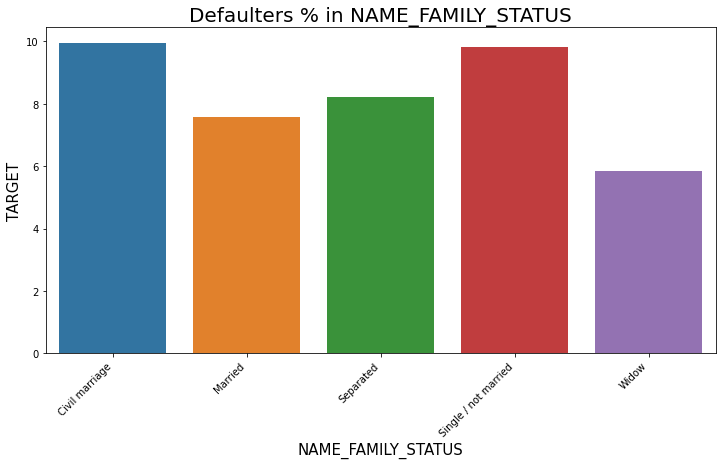

In [110]:
Defaulter_perc(app_df,'NAME_FAMILY_STATUS','TARGET')

In [111]:
app_df['NAME_FAMILY_STATUS'].groupby(app_df['TARGET']).value_counts()

TARGET                      
0       Married                 181426
        Single / not married     40934
        Civil marriage           26791
        Separated                18137
        Widow                    15137
1       Married                  14836
        Single / not married      4452
        Civil marriage            2959
        Separated                 1620
        Widow                      937
Name: NAME_FAMILY_STATUS, dtype: int64

**Analysis**

Most of the people who have taken loan are married, followed by Single/not married and civil marriage

In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).

**Defaulter and Non Defaulter on the basis of Own Car status**

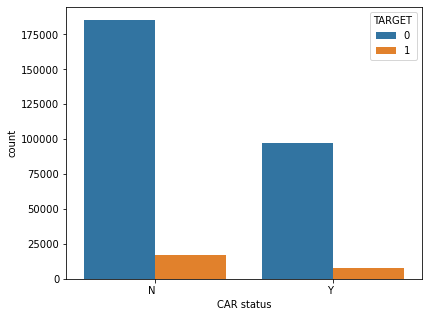

In [112]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='CAR status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment='right')

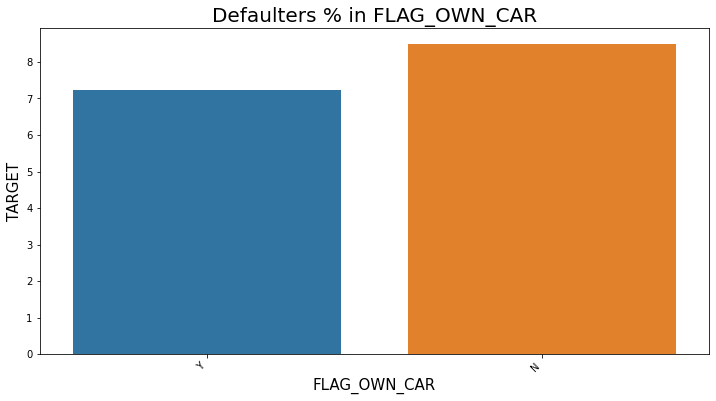

In [113]:
Defaulter_perc(app_df,'FLAG_OWN_CAR','TARGET')

**Analysis**

Most of People who have taken the loans are someone who doesn't have Cars

People who dont have cars have slightly higher chance of being the defaulter than with someone who have cars

**Defaulter and Non Defaulter on the basis of Own real state status**

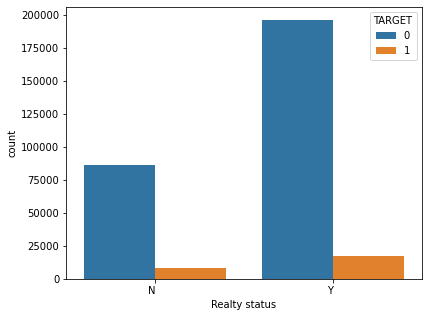

In [114]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'FLAG_OWN_REALTY',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Realty status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment='right')

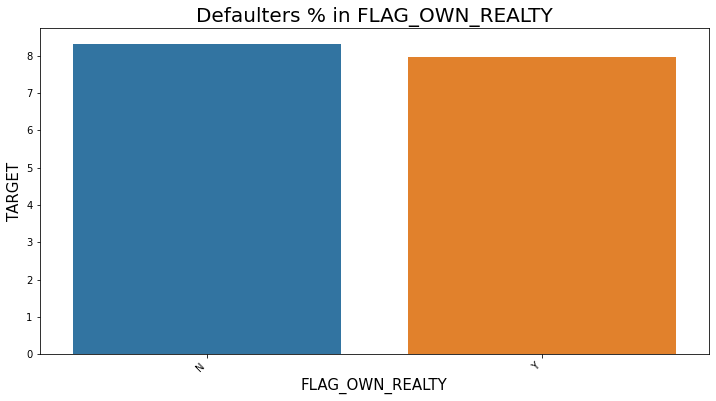

In [115]:
Defaulter_perc(app_df,'FLAG_OWN_REALTY','TARGET')

**Analysis**

The clients who own real estate are more than double of the ones that don't own.

The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.

**Defaulter and Non Defaulter on the basis of Region Rating client**

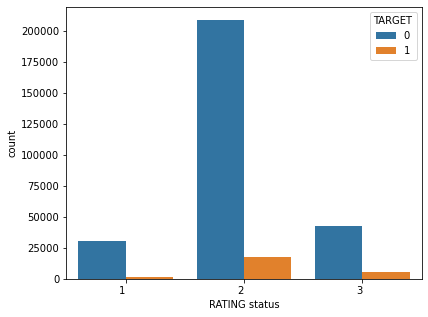

In [116]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'REGION_RATING_CLIENT',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='RATING status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment='right')

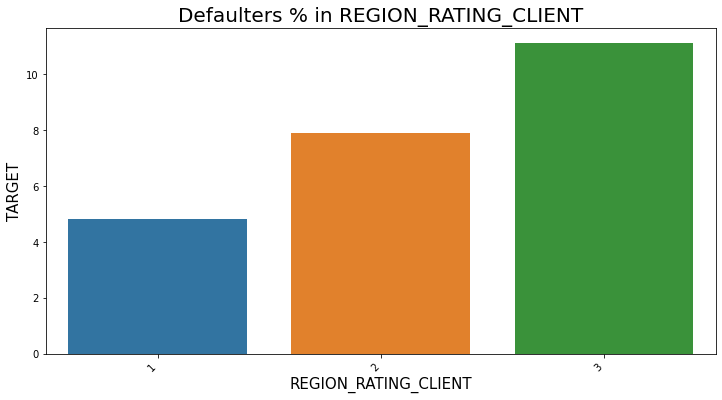

In [117]:
Defaulter_perc(app_df,'REGION_RATING_CLIENT','TARGET')

**Analysis**

Most of the applicants are living in Region with Rating 2 place.

Region Rating 3 has the highest default rate around(12%).

Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans.

**Defaulter and Non Defaulter on the basis of Occupation Type**

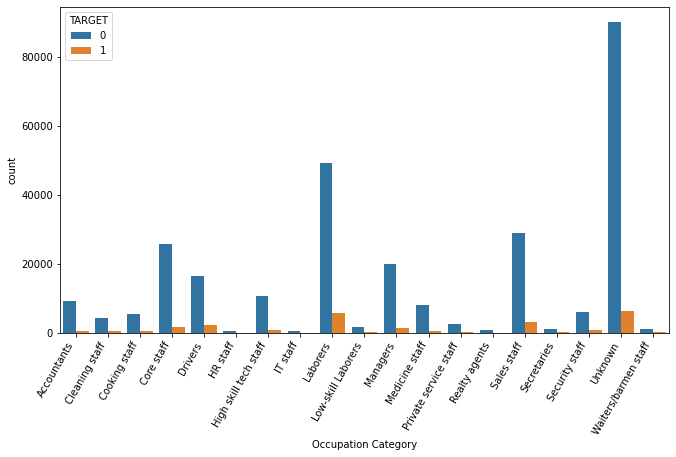

In [118]:
plt.figure(figsize=(24,6))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=app_df,hue=app_df['TARGET'])
ax.set(xlabel='Occupation Category')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, horizontalalignment='right')

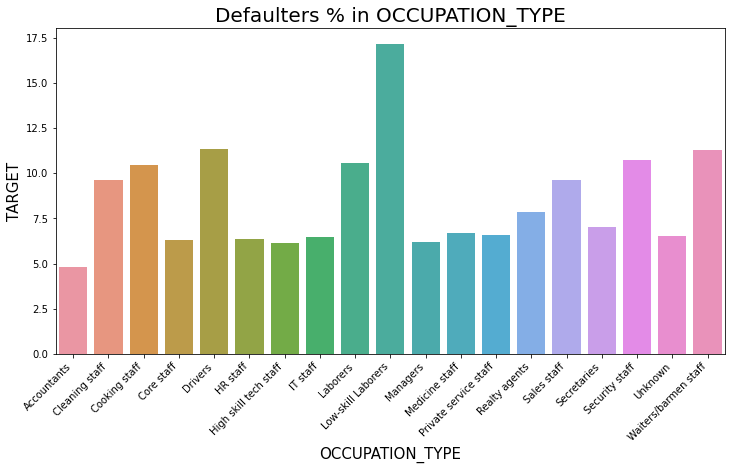

In [119]:
Defaulter_perc(app_df,'OCCUPATION_TYPE','TARGET')

**Analysis**

Most of the loans are taken by Laborers, followed by Sales staff.

IT staff are less likely to apply for Loan.

Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

In [120]:
app_df[app_df['FLAG_OWN_CAR']=='Y']['OCCUPATION_TYPE'].groupby(app_df['TARGET']).value_counts()

TARGET                       
0       Unknown                  22890
        Laborers                 19811
        Drivers                  11518
        Managers                 10548
        Core staff                8495
        Sales staff               7908
        High skill tech staff     4195
        Accountants               3304
        Security staff            2397
        Medicine staff            1811
        Cooking staff             1073
        Private service staff      732
        Cleaning staff             572
        Low-skill Laborers         561
        Secretaries                318
        Waiters/barmen staff       250
        Realty agents              231
        IT staff                   217
        HR staff                   178
1       Laborers                  1885
        Unknown                   1514
        Drivers                   1283
        Sales staff                716
        Managers                   630
        Core staff                

In [121]:
app_df[app_df['FLAG_OWN_CAR']=='N']['OCCUPATION_TYPE'].groupby(app_df['TARGET']).value_counts()

TARGET                       
0       Unknown                  67168
        Laborers                 29491
        Sales staff              21067
        Core staff               17300
        Managers                  9474
        High skill tech staff     6475
        Medicine staff            6146
        Accountants               6024
        Drivers                   4965
        Cooking staff             4246
        Cleaning staff            3629
        Security staff            3595
        Private service staff     1742
        Low-skill Laborers        1171
        Waiters/barmen staff       944
        Secretaries                895
        Realty agents              461
        HR staff                   349
        IT staff                   274
1       Unknown                   4760
        Laborers                  3947
        Sales staff               2373
        Core staff                1251
        Drivers                    824
        Managers                  

With this we can Conclude that low skills labour,waiters,driver and securtiy staff and cooling staff who owns cars and  any realty have the higher chance that they can return the loan so approving the loan to them is not much risky 

In [122]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE', 'YEARS_EMPLOYED', 'AGE_GROUP', 'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE', 'EXT_SCORE_CATEGORY'], dtype='object')

**Segmented Univariate Analysis**

In [123]:
app_df['AGE_GROUP'].unique()

array(['Young', 'Mid Age', 'Senior'], dtype=object)

In [124]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Young') & (app_df['TARGET'] == 1)])/
                len(app_df[app_df['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Mid Age') & (app_df['TARGET'] == 1)])/
                 len(app_df[app_df['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Senior') & (app_df['TARGET'] == 1)])/
                len(app_df[app_df['AGE_GROUP'] == 'Senior']),2)

In [125]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

,AGE_GROUP,Percentage
0,Young,10.40
1,Mid Age,7.07
2,Senior,5.04


In [126]:
# Taking the percentage of each age group who was non defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Young') & (app_df['TARGET'] == 0)])/
                len(app_df[app_df['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Mid Age') & (app_df['TARGET'] == 0)])/
                 len(app_df[app_df['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(app_df[(app_df['AGE_GROUP'] == 'Senior') & (app_df['TARGET'] == 0)])/
                len(app_df[app_df['AGE_GROUP'] == 'Senior']),2)

In [127]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_ndefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_ndefault = pd.DataFrame(agegroup_ndefault) 
df_agegroup_ndefault

,AGE_GROUP,Percentage
0,Young,89.60
1,Mid Age,92.93
2,Senior,94.96


Text(0.5, 1.0, 'Non-Defaulters')

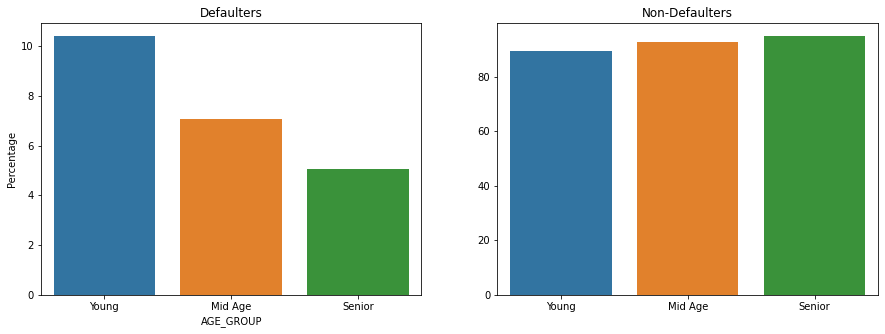

In [128]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_ndefault)
plt.title('Non-Defaulters')

**Analysis**

We can see that the Young people is more likely to dafault and senior category people more punctual towards their loan repayment.

**Defaulter and Non defaulter based on credit group**

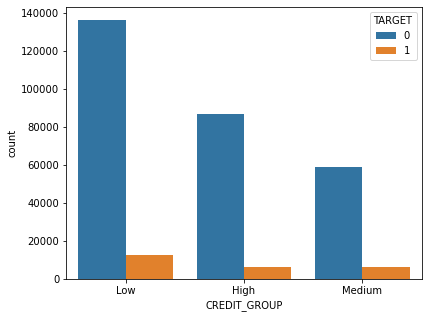

In [129]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=app_df,hue=app_df['TARGET'])

**Analysis**

As expected low credit amount groups are more in number, who were not defaulted whereas surprisingly **low credit amount group are slightly higher in number than other in defaulted Count .** 

**Defaulter and Non Defaulter based on Income Group**

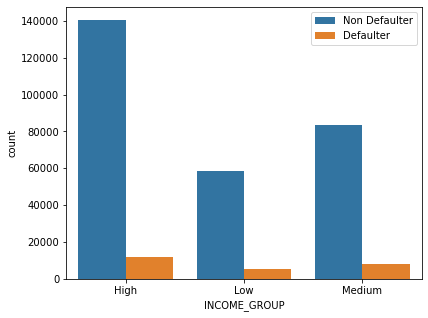

In [130]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=app_df,hue=app_df['TARGET'])
ax.legend(['Non Defaulter', 'Defaulter'])
plt.show()

**Analysis**

**Defaulters** - Surprisingly the High income group is slightly more in number to be defaulted, then Medium and then Low.

**Non defaulters** - Here as expected the count of non defaulters more in High income group and less in low income group.

**Normalized score from external data source**

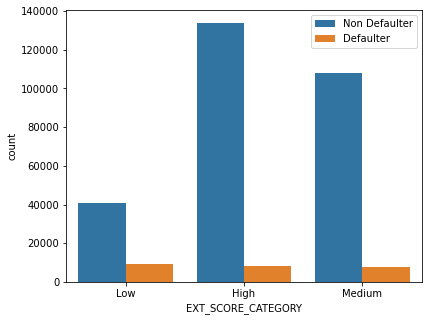

In [131]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=app_df,hue=app_df['TARGET'])
ax.legend(['Non Defaulter', 'Defaulter'])
plt.show()

**Analysis**

No surprise that High scorer from external data source are more likely to be non defaulters. Followed by the medium scorer than Low has the lowest value to be a non defaulter

Low Medium and High all has a comparable count to be a defaulter so we can't say anything related to this.

**Bivariate And Multivariate Analysis**

In [132]:
app_df['AMT_INCOME_TOTAL'].groupby(app_df['NAME_INCOME_TYPE']).describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71569.0,202985.968889,147996.302296,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55339.0,136415.535930,76660.220629,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21680.0,179788.959971,100902.484144,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158586.0,163212.656486,307746.222065,25650.0,112500.0,135000.0,202500.0,117000000.0


In [133]:
#client With Payment difficulties
app_df_target_1= app_df[app_df['TARGET']==1]
#client with all other cases
app_df_target_0 = app_df[app_df['TARGET']==0]

**Credit amount of the loan on the basis of client income for both male and female**

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non Defaulters')

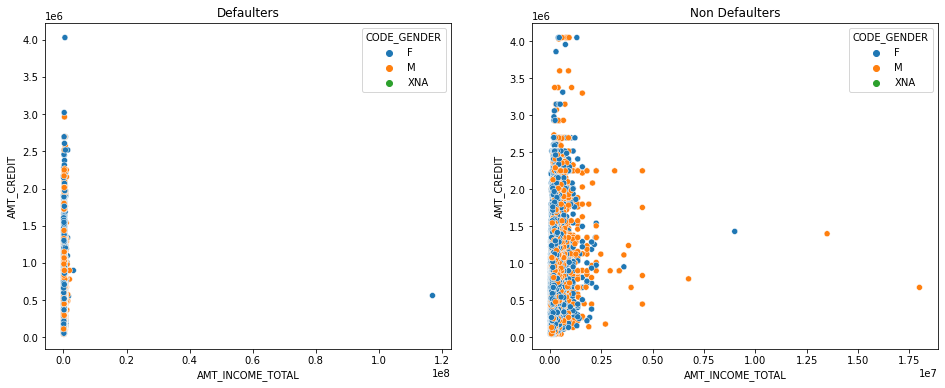

In [135]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=app_df_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=app_df_target_0)
plt.title('Non Defaulters')

Analysis

Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.

Non defaulters - We can hardly figure out any pattern out of this.

**Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client**

In [136]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE', 'YEARS_EMPLOYED', 'AGE_GROUP', 'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE', 'EXT_SCORE_CATEGORY'], dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non Defaulters')

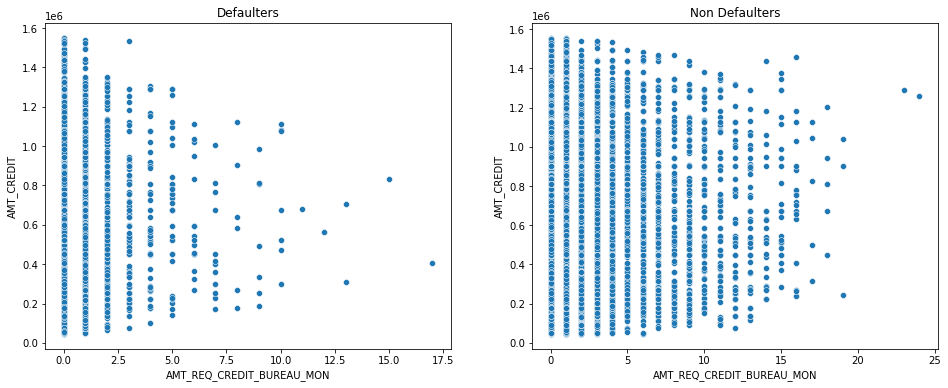

In [179]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_MON','AMT_CREDIT', data=app_df_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_MON','AMT_CREDIT', data=app_df_target_0)
plt.title('Non Defaulters')

**Analysis**

We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

**Bivariate analysis on categorical variable**

In [181]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

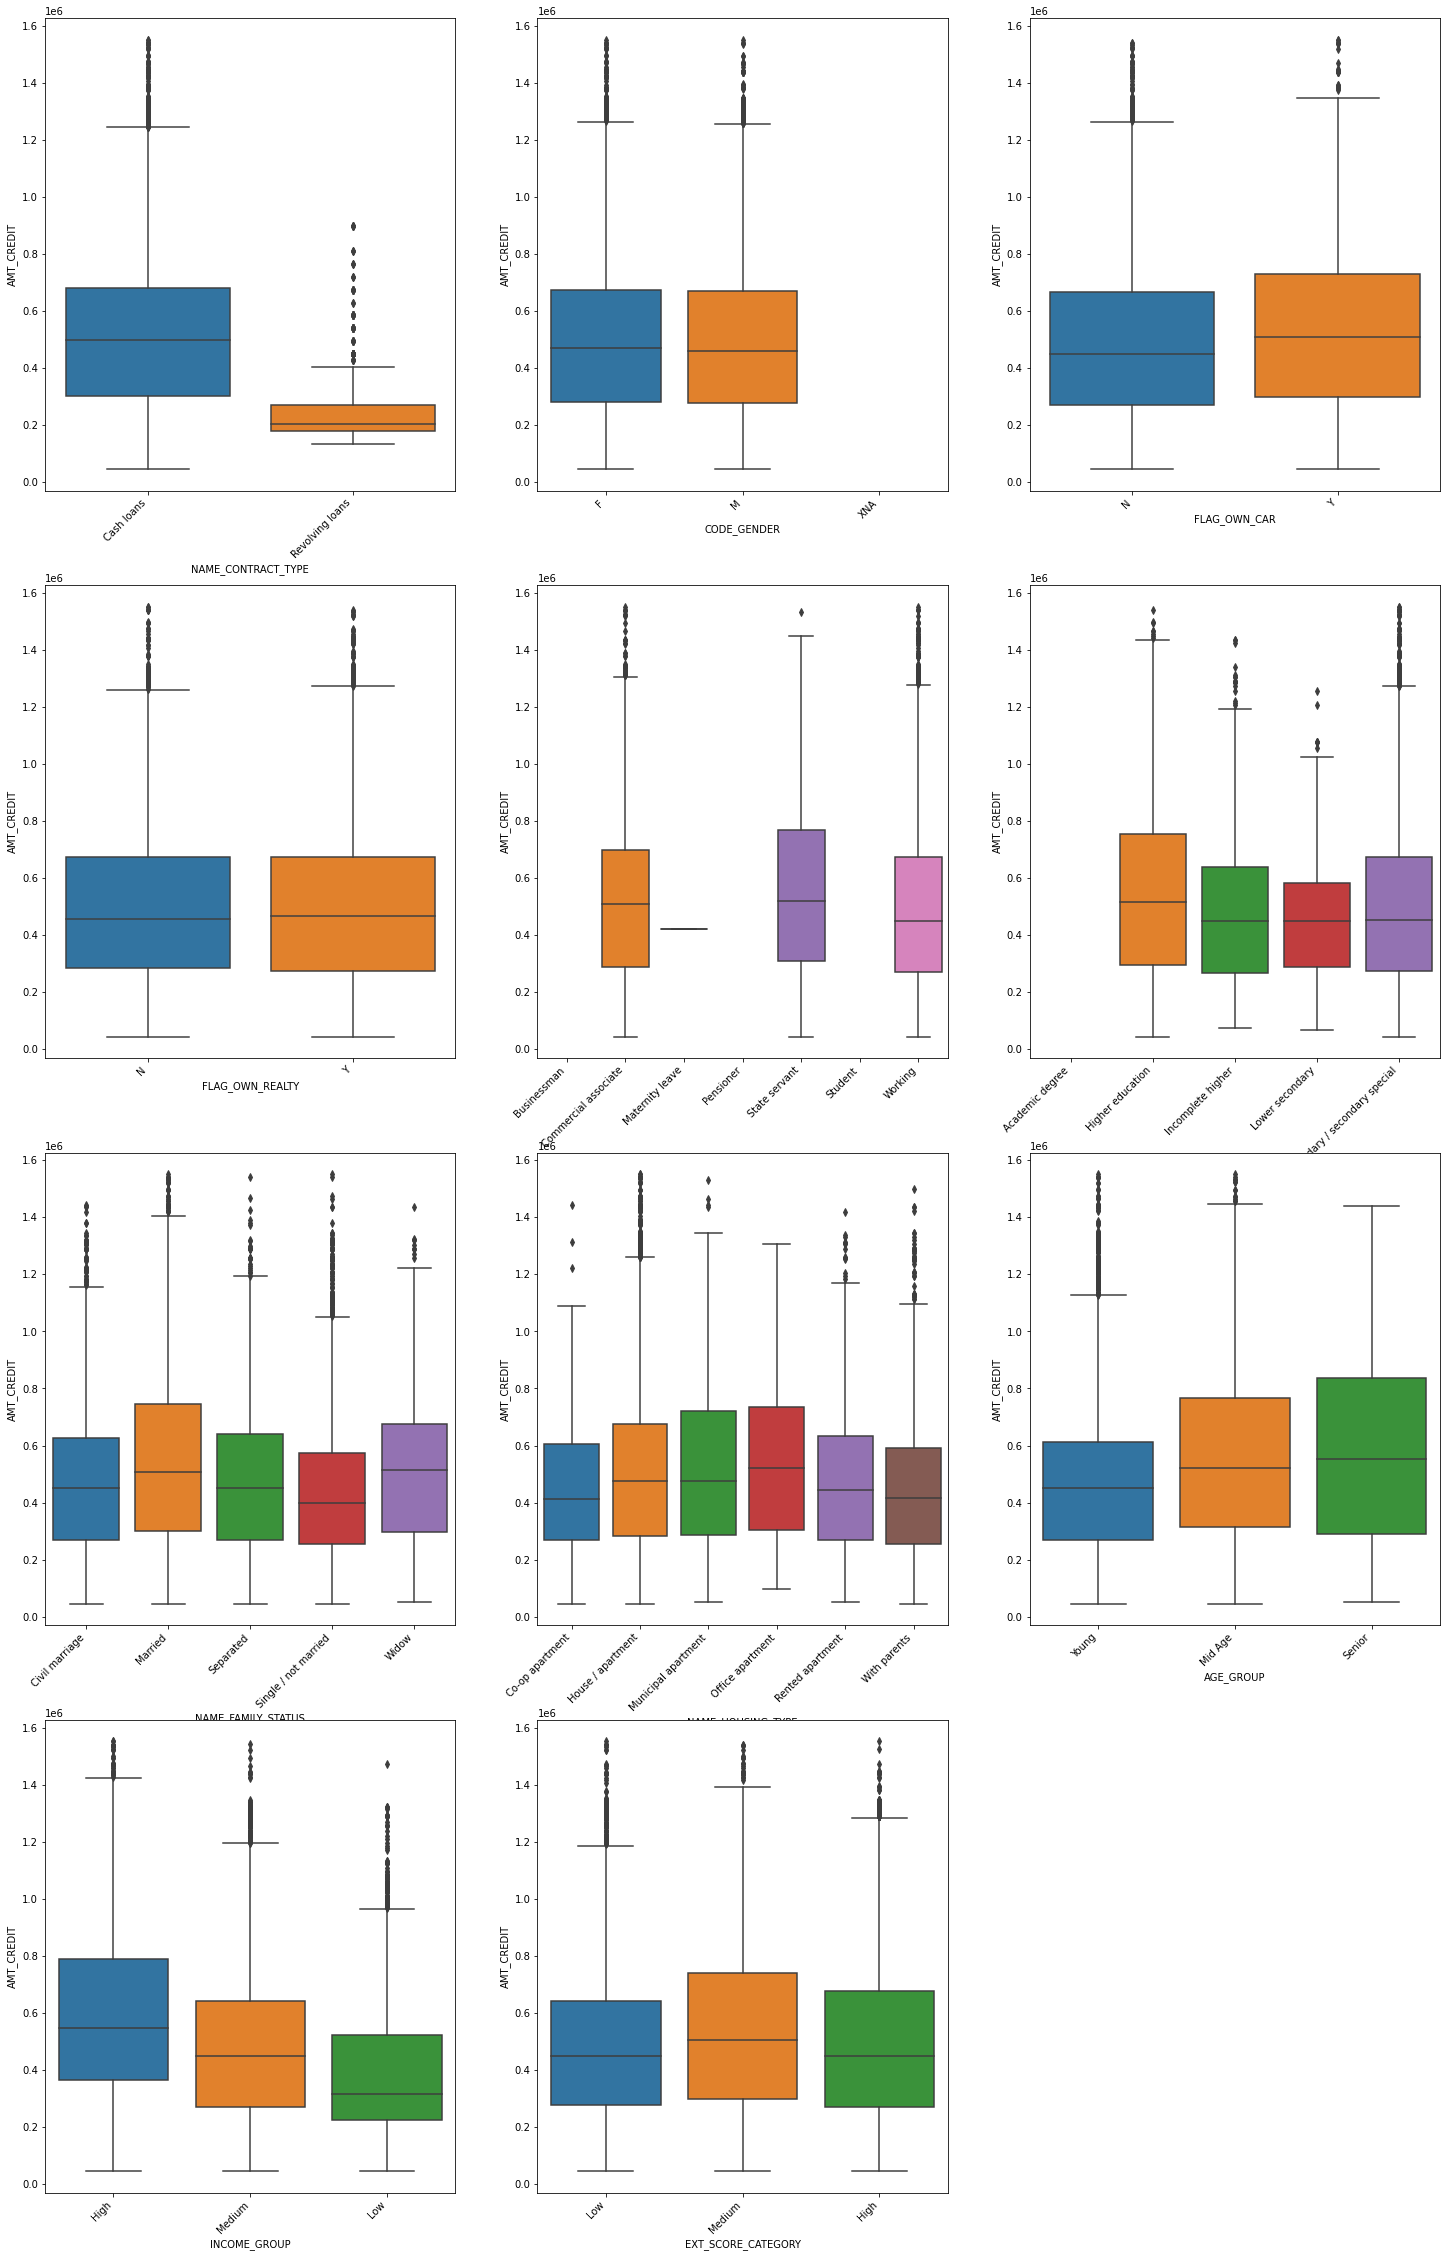

In [183]:
#For Defaulter
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_df_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Analysis**

Credit amount of the loans are very low for Revolving loans.

There is no credit amount differnce between genders, client owning cars or realty.

The Young age group got less amount of loan credited cmpared to mid age and senior citizen.

Higher income group have more loan amount credited.

Clients having medium external score have more loan amount.

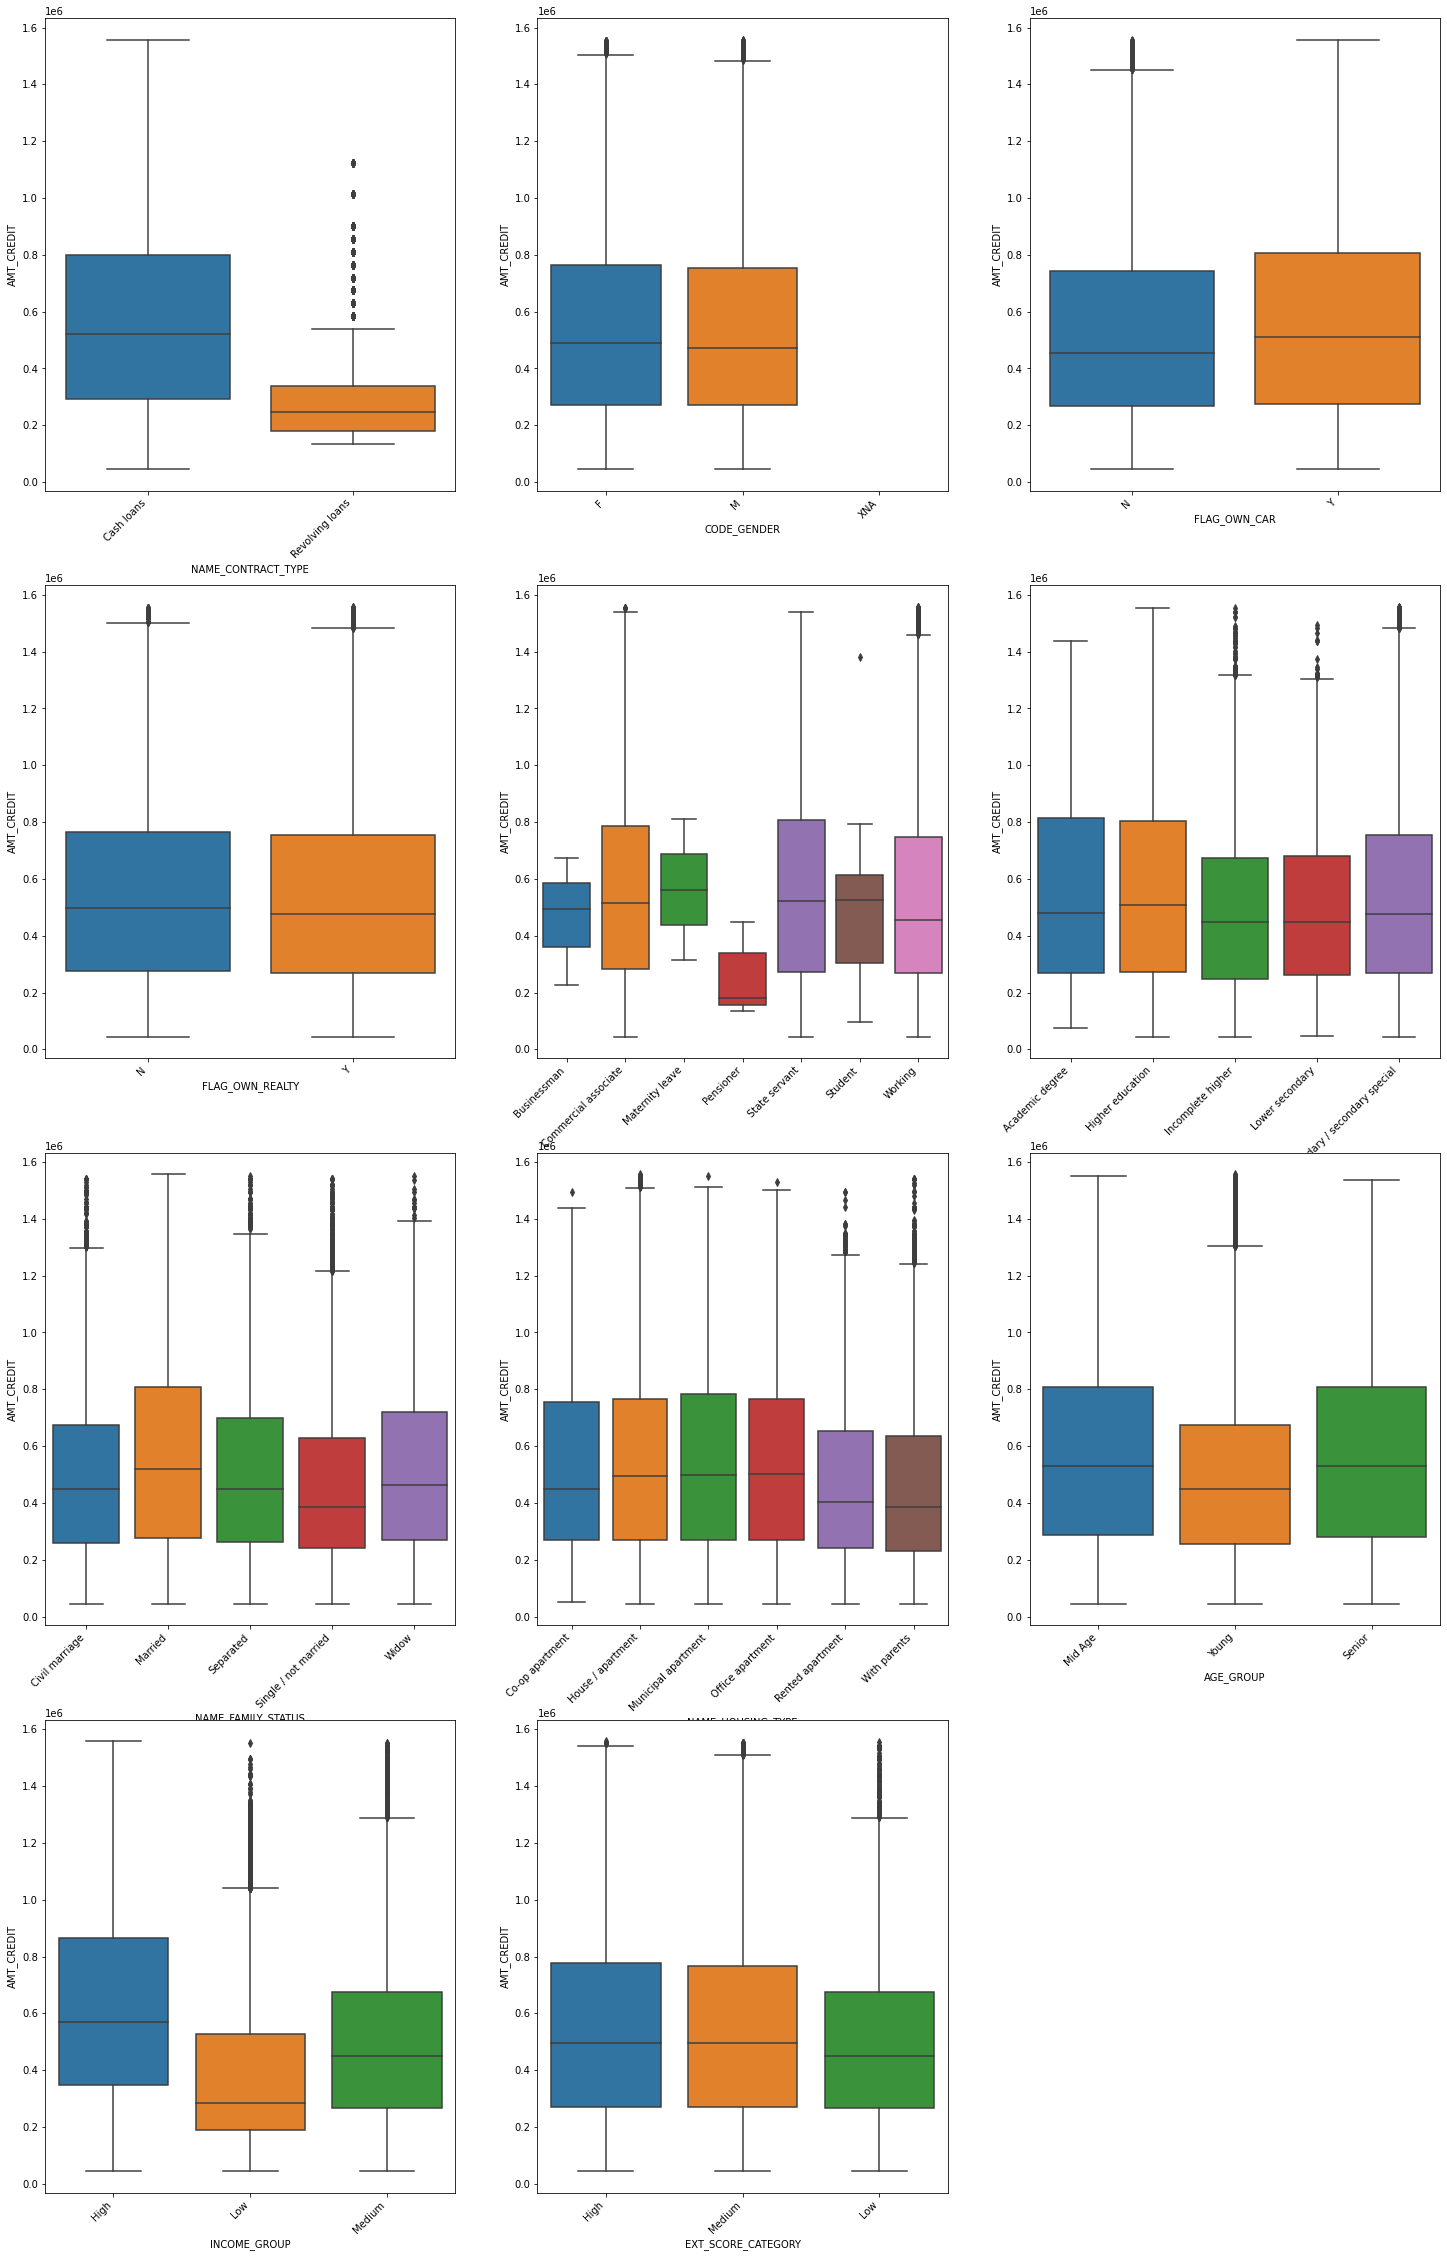

In [185]:
#Non Defaulter
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_df_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Analysis**

Credit amount of the loans are very low for Revolving loans.

There is no credit amount differnce between genders, client owning cars or realty.

The young age group got less amount of loan credited cmpared to mid age and senior citizen.

Higher income group have more loan amount credited and lower the lowest.

The Married people have more loan amount credited.

Clients having higher external score have slightly more loan amount.

**Merging current application and Previous application dataset**

In [137]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP',
                 'INCOME_GROUP','EXT_SCORE_CATEGORY']

In [138]:
# Creating a dataset from current application for merging 
df_current_to_merge = app_df[cols_current]
df_current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,High
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,High
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,High
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,High


In [139]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [140]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = prev_df.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,Repeater,POS,Country-wide,12.0,middle,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,NaN,Repeater,Cash,Contact center,36.0,low_action,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,high,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,middle,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,24.0,high,27


In [141]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,Repeater,POS,Country-wide,12.0,middle,3,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,NaN,Repeater,Cash,Contact center,36.0,low_action,6,0.0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,High
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,high,11,0.0,F,Secondary / secondary special,Married,Young,Low,High
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,middle,18,0.0,M,Secondary / secondary special,Married,Senior,High,High
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,24.0,high,27,0.0,F,Secondary / secondary special,Married,Young,High,Medium


In [142]:
df_merged.shape

(1670214, 21)

In [143]:
perc_nullvalues(df_merged)

NAME_PAYMENT_TYPE       37.56
NAME_YIELD_GROUP        30.97
NAME_PORTFOLIO          22.29
EXT_SCORE_CATEGORY      15.43
TARGET                  15.43
INCOME_GROUP            15.43
AGE_GROUP               15.43
NAME_FAMILY_STATUS      15.43
NAME_EDUCATION_TYPE     15.43
CODE_GENDER             15.43
NAME_CLIENT_TYPE         0.12
NAME_CONTRACT_TYPE       0.02
AMT_CREDIT               0.00
SK_ID_PREV               0.00
MONTH_DECISION           0.00
CNT_PAYMENT              0.00
SK_ID_CURR               0.00
NAME_CONTRACT_STATUS     0.00
AMT_APPLICATION          0.00
AMT_ANNUITY              0.00
CHANNEL_TYPE             0.00
dtype: float64

In [144]:
len(df_merged[np.isnan(df_merged['TARGET'])])

257776

We can see that there are NaN values in the current application columns in the merged datasets. Because few SK_ID_CURR are present in the previous application dataset, but those IDs are not present in the current application dataset. Eg:- SK_ID_CURR == 124158 is present in the previous application but not in present. We will remove those such records.

In [145]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]

In [146]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

We can create a new derived column for what percentage of the applied amount was credited for each client. Derived column name :- PERCENT_CREDIT

In [147]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,Repeater,POS,Country-wide,12.0,middle,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,NaN,Repeater,Cash,Contact center,36.0,low_action,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,High,111.88
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,high,11,0,F,Secondary / secondary special,Married,Young,Low,High,121.28
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,middle,18,0,M,Secondary / secondary special,Married,Senior,High,High,104.62
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,24.0,high,27,0,F,Secondary / secondary special,Married,Young,High,Medium,119.72


In [148]:
df_merged.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'MONTH_DECISION', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'AGE_GROUP', 'INCOME_GROUP', 'EXT_SCORE_CATEGORY', 'PERCENT_CREDIT'], dtype='object')

NAME_CONTRACT_STATUS  TARGET
Approved              0         818151
                      1          67185
Canceled              0         235520
                      1          23787
Refused               0         215662
                      1          29385
Unused offer          0          20869
                      1           1879
Name: TARGET, dtype: int64

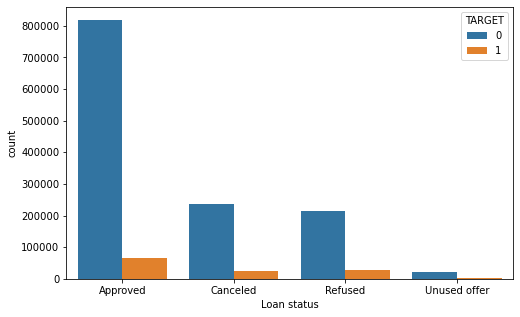

In [149]:
#Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged,hue='TARGET')
ax.set(xlabel='Loan status')

df_merged.groupby('NAME_CONTRACT_STATUS')['TARGET'].value_counts()

Text(0, 0.5, 'Current defaulters')

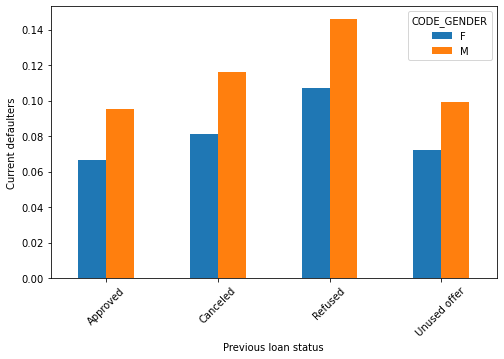

In [178]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Text(0, 0.5, 'Current defaulters')

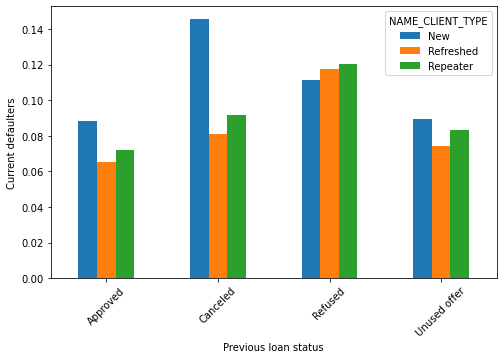

In [179]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

**Analysis**

There are huge number of Approved loan than Refused. Hardly, there are any Canceled or Unused offer loan.

For previously Approved status the New clients were more defaulted followed by Repeater.

For previously Refused applicants the Defaulters are more Refreshed clients.

For previously Canceled applicants the Defaulters are more New clients.

In [150]:
df_merged['NAME_CONTRACT_STATUS'].unique()

['Approved', 'Refused', 'Canceled', 'Unused offer']
Categories (4, object): ['Approved', 'Canceled', 'Refused', 'Unused offer']

Text(0, 0.5, 'Current defaulters')

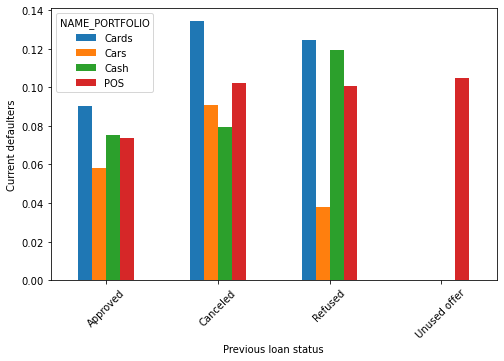

In [180]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Analysis

Most of the clients were defaulted, who previously applied loan for Cards.

For approved loan status the clients applied for Cars are less defaulted.

For Refused loan status the clients applied for POS are less defaulted.

Text(0, 0.5, 'Current defaulters')

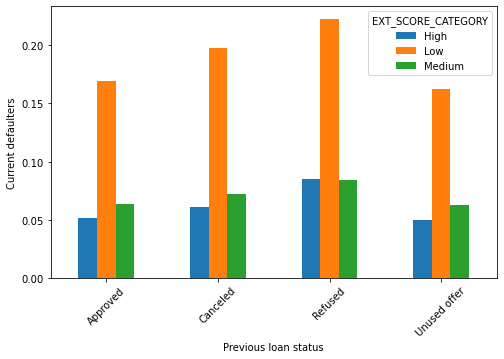

In [181]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Analysis

Applicants with low external source score are highly defaulted.

Higher scorer applicants are very ulikely to default irrespective of their previous loan status.

**Application amount and credited amount**

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


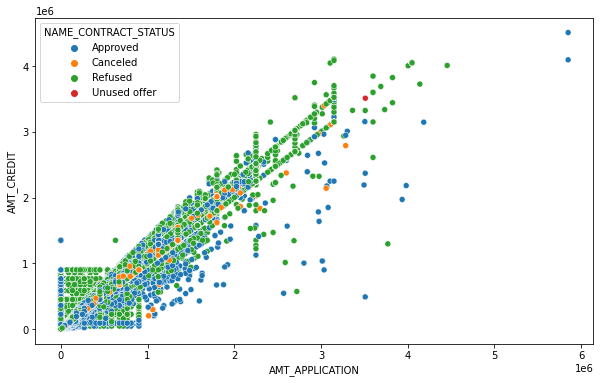

In [151]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

**Analysis**

We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

**Application amount and the month taken to take decision related to current application**

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


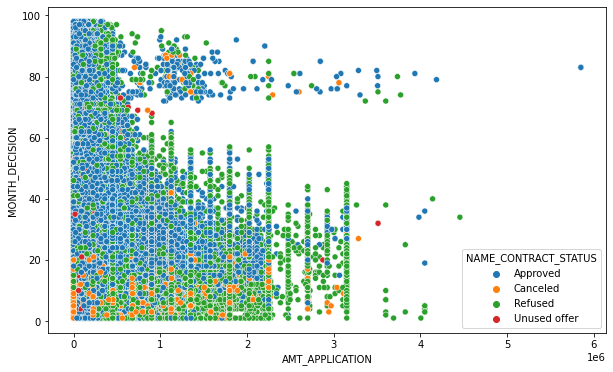

In [152]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)

**Analysis**

We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application and there is high chances that lower application amount get approved even though take large time.

In [153]:
df_merged.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'MONTH_DECISION', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'AGE_GROUP', 'INCOME_GROUP', 'EXT_SCORE_CATEGORY', 'PERCENT_CREDIT'], dtype='object')

**Status and Client type**

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

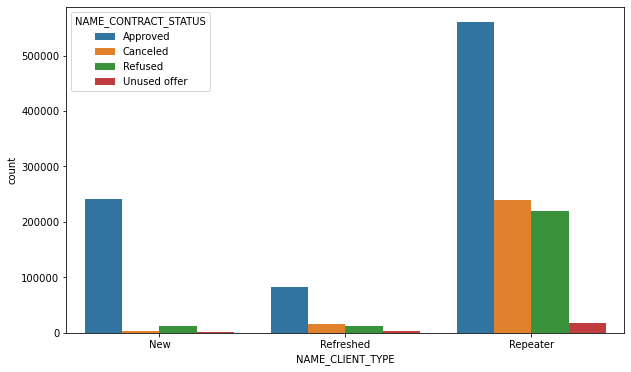

In [154]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

**Analysis**

We see that the Repeater clients have more approved loans than New and Refreshed clients.

**Current loan defaulter status with respect to previous loan application status**


Text(0, 0.5, 'Current defaulters')

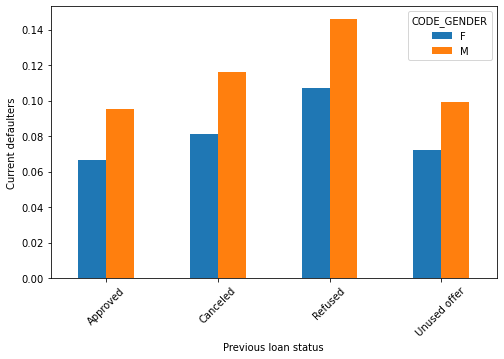

In [155]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

**Analysis**

We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females

**Current loan defaulter status with respect to previous loan application status and age group**

Text(0, 0.5, 'Current defaulters')

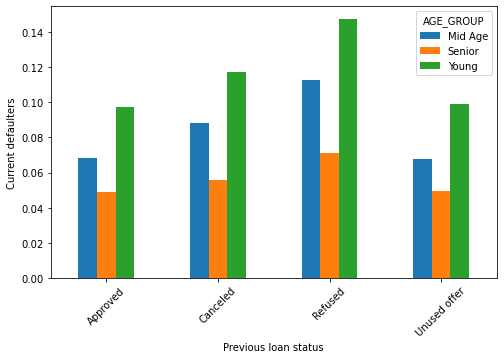

In [137]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

**Analysis**

For all the previous status Young applicants are more defaulted.

For all the previous status Senior applicants are less defaulted compared to others.

**Current loan defaulter status with respect to previous loan application status and external source score category**

Text(0, 0.5, 'Current defaulters')

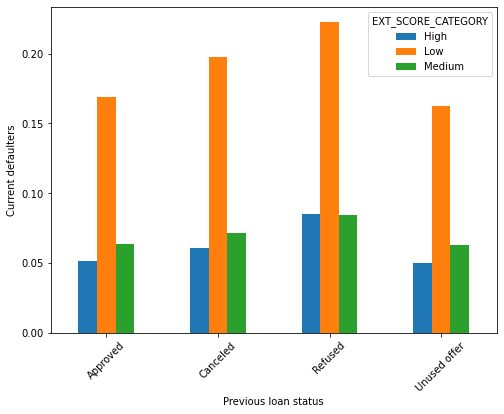

In [144]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

**Analysis**

Applicants with low external source score are highly defaulted.

Higher scorer applicants are very ulikely to default irrespective of their previous loan status.

# Top 10 correlation for the Client

In [145]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE', 'YEARS_EMPLOYED', 'AGE_GROUP', 'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE', 'EXT_SCORE_CATEGORY'], dtype='object')

In [149]:
correl_col=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CNT_CHILDREN', 'AMT_INCOME_TOTAL'
            , 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE','OCCUPATION_TYPE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
            'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE','AGE','EXT_SOURCE_SCORE', 
            'YEARS_EMPLOYED','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [150]:
#Non Defaulter dataframe
NDefaulter_df = app_df.loc[app_df['TARGET']==0, correl_col]

# Defaulters dataframe
Defaulter_df = app_df.loc[app_df['TARGET']==1, correl_col]

In [152]:
# Getting  top 10 correlation for the NonDefaulter dataframe

corr_repayer = NDefaulter_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_2660\2414231997.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()


,VAR1,VAR2,Correlation
28,AMT_GOODS_PRICE,AMT_CREDIT,0.987253
29,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
19,AMT_ANNUITY,AMT_CREDIT,0.771113
58,YEARS_EMPLOYED,AGE,0.626069
18,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418745
27,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461
9,AMT_CREDIT,AMT_INCOME_TOTAL,0.342580
49,EXT_SOURCE_SCORE,AGE,0.183079
54,YEARS_EMPLOYED,AMT_INCOME_TOTAL,0.140504
48,EXT_SOURCE_SCORE,AMT_GOODS_PRICE,0.113823


<AxesSubplot:>

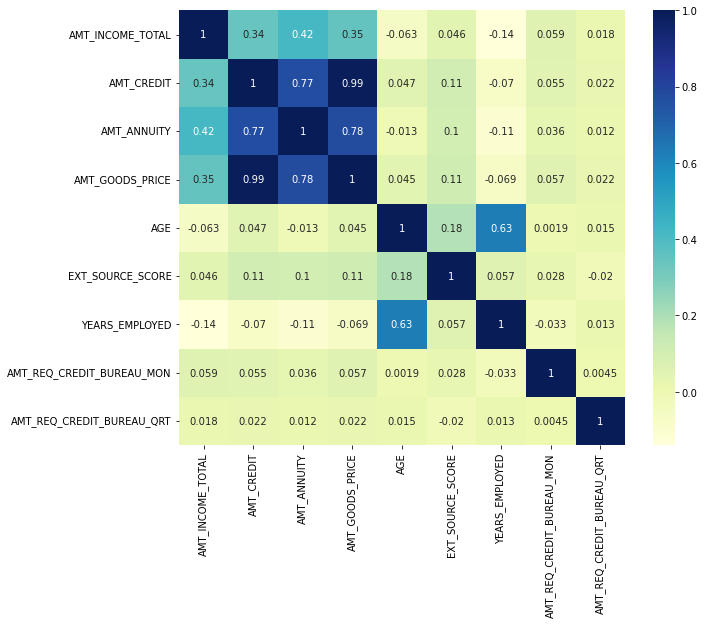

In [157]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_repayer,cmap="YlGnBu",annot=True)

**Analysis**

Highly Correlated columns for non Defaulters are:

**Amount Good price and Amount credit**.

**Amount Good price and Amount annuity**.

**Amount credit and Amount annuity**.

In [159]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_2660\429192889.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))


,VAR1,VAR2,Correlation
28,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
29,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
19,AMT_ANNUITY,AMT_CREDIT,0.751957
58,YEARS_EMPLOYED,AGE,0.582545
49,EXT_SOURCE_SCORE,AGE,0.184311
48,EXT_SOURCE_SCORE,AMT_GOODS_PRICE,0.139405
39,AGE,AMT_GOODS_PRICE,0.135578
37,AGE,AMT_CREDIT,0.135084
46,EXT_SOURCE_SCORE,AMT_CREDIT,0.132023
47,EXT_SOURCE_SCORE,AMT_ANNUITY,0.104467


<AxesSubplot:>

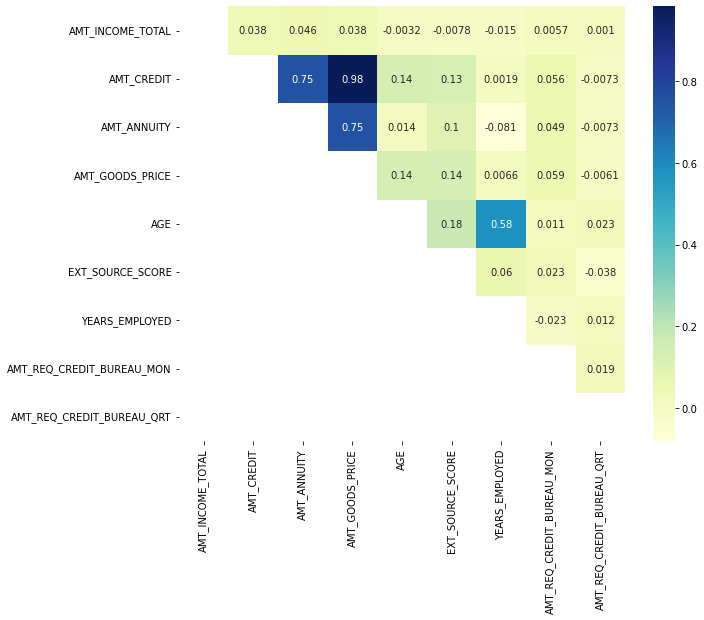

In [160]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_Defaulter,cmap="YlGnBu",annot=True)

**Analysis**

Credit Amount in both Repayer and Defaulter case are highly correlated with amount good Prices.

We can see that the correlation between the age and years employed is higher in case of repayer than Defaulter.

There is a severe drop in the correlation between total income of the client and the credit amount(0.038) 
amongst defaulters whereas it is 0.34 among repayers same drop of total income with  amount annuity and amount good price of 
repayer and Defaulter can also be seen.

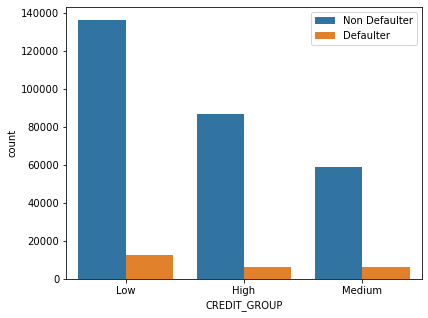

In [174]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=app_df,hue=app_df['TARGET'])
ax.legend(['Non Defaulter', 'Defaulter'])
plt.show()

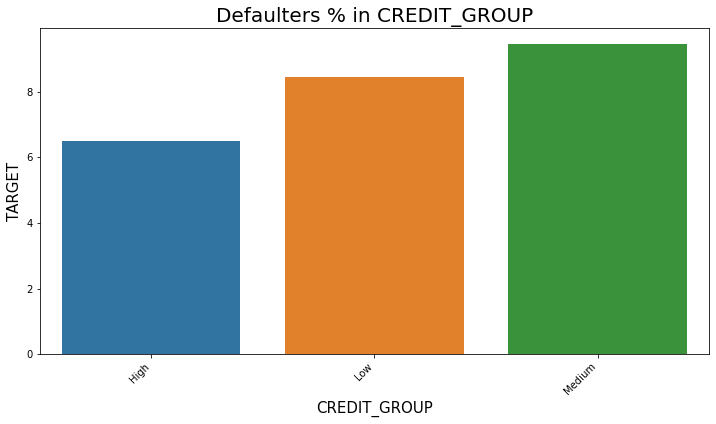

In [175]:
Defaulter_perc(app_df,'CREDIT_GROUP','TARGET')

Text(0, 0.5, 'Current defaulters')

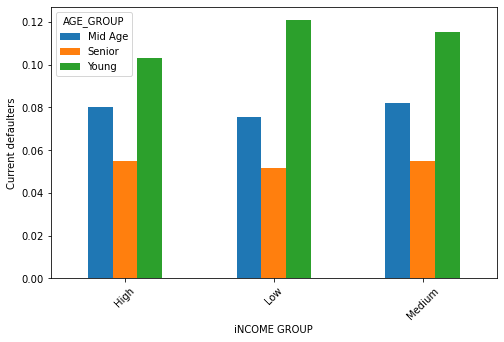

In [177]:
df_merged.pivot_table(values='TARGET',index='INCOME_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('iNCOME GROUP')
plt.ylabel('Current defaulters')

# Result

After analysing all the features we can conclude that there are few attribute of a client on which bank would identify if they will repay the loan or not.  
    1. Bank should focus more on Income types student, businessman and pensioner who  have no default percent or have very less        default chances. Bank should refrain from giving loan to someone who is on maternity leave and who are unemployed as            they have high default rate.    
    2. Bank should focus more on someone who have Academic degree and atleast completed their higher education has they have          less default rate. Bank should refrain from giving loan to people who have completed lower secondary.    
    3. Region rating of client also influencing their chances of getting defaulter. Region rating 1 clients repay the loan on          time whereas rating 3 clients are mostly defaulters.    
    4. Bank should check occupation of client before giving the loan. Low skill labourers, labourers and drivers are mostly the        defaulters.    
    5. Since almost 90 % of applicants have Income less than 3L and they have high probability of defaulting, they could be            offered loan with Higher Interest compare to others category.
    6. People who get loan between 5-8Lakh in medium credit group are tend to default more and hence having the higher interest        rate for this credit range would be ideal.    
    7. It is recommended to provide loans to previously approved females.    
    8. Clients whose applications are refused or unused previously tend to be more risky hence having higher interest rate for        that clients would be ideal